In [29]:
options(warn=-1)

In [22]:
library("googleAuthR")
library("googleAnalyticsR")

In [23]:
client.id = ""
client.secret = ""

In [24]:
options(googleAuthR.client_id = client.id) 
options(googleAuthR.client_secret = client.secret) 
options(googleAuthR.scopes.selected = "https://www.googleapis.com/auth/analytics")

In [25]:
gar_auth(email='enzo.mail@gmail.com')
#ga_auth()

2020-03-10 10:50:42> Setting client.id from options(googleAuthR.client_id)



In [26]:
ga_id <- 49652858

In [27]:
gdata <- google_analytics(ga_id,
                date_range = c("2015-01-01", "2015-03-01"),
                metrics = "sessions",
                dimensions = "date")

Auto-refreshing stale OAuth token.

2020-03-10 10:50:51> Downloaded [60] rows from a total of [60].



In [98]:
require(RGoogleAnalytics)

In [106]:
# RGoogleAnalytics
query.list <- Init(start.date = "2013-11-28",
                   end.date = "2013-12-04",
                   dimensions = "ga:date",
                   metrics = "ga:sessions",
                   max.results = 10000,
                   sort = "-ga:date",
                   table.id = "ga:49652858")

In [105]:
token <- Auth(client.id, client.secret)

Waiting for authentication in browser...

Press Esc/Ctrl + C to abort

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=557190202599-h9t55iodg7rmbm4boli731tkhlrl926o.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=2b4ghlhQle



In [112]:
subset(gdata, gdata$sessions == max(gdata$sessions))

date       sessions
26 2015-01-26 492

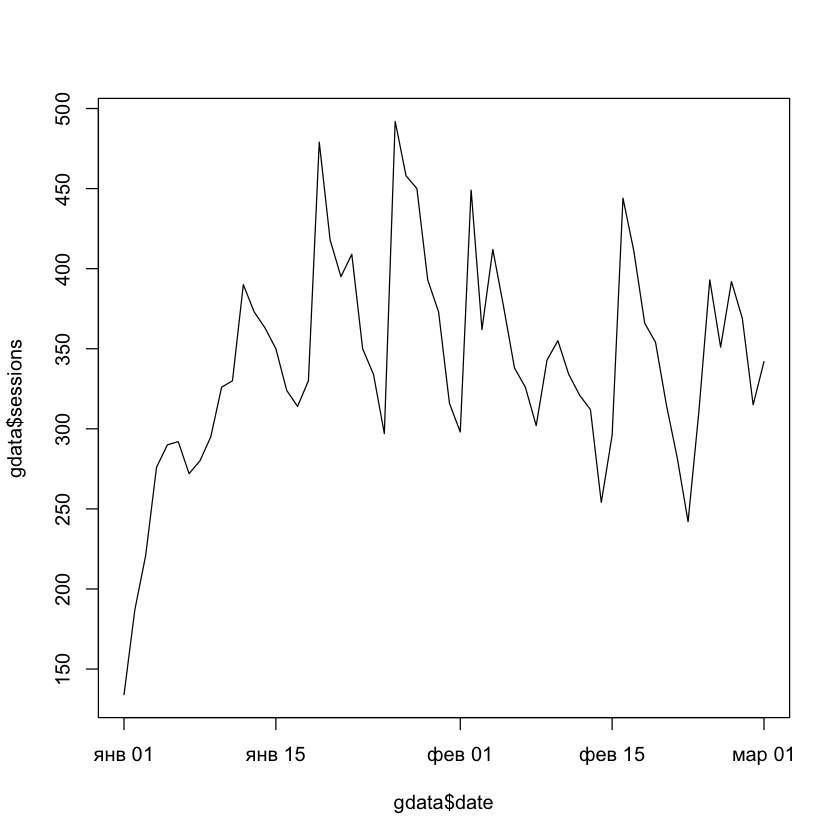

In [30]:
plot(gdata$date, gdata$sessions, type="l")

In [55]:
library(ganalytics)

In [70]:
gadata <- google_analytics(ga_id, date_range=c("2015-09-01", "2019-09-30"), 
                           metrics = "sessions",
                           dimensions = "date",
                           max = 5000)

2020-03-10 11:27:36> Downloaded [1491] rows from a total of [1491].



In [75]:
library(RGoogleAnalytics)

In [84]:
oauth_token <- Auth(client.id = client.id, client.secret = client.secret)

Waiting for authentication in browser...

Press Esc/Ctrl + C to abort

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=557190202599-h9t55iodg7rmbm4boli731tkhlrl926o.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=HlSsPrzX2k

Authentication complete.



In [100]:
query.list <- Init(start.date = "2014-01-20",
              end.date = "2014-01-20",
              dimensions = "ga:minute",
              metrics = "ga:sessions",
              table.id = "ga:49652858")

In [116]:
if (!file.exists("~/.token")) { 
   token <- Auth(client.id, client.secret)
   token <- save(token, file="~/.token")
} else {
    load("~/.token")
}

In [675]:
ValidateToken(token)

Access Token successfully updated.



In [121]:
library(httpuv)

In [620]:
start.date <- "2018-11-01"
end.date <- "2018-11-01"

In [681]:
query.list <- Init(start.date = start.date,
                   end.date = end.date,
                   dimensions = "ga:dateHourMinute",
                   #dimensions = "ga:date, ga:hour, ga:minute",
                   metrics = "ga:sessions",
                   filters = "ga:sessions%3E0",
                   max.results = 10000,
                   table.id = "ga:49652858")

ga.query <- QueryBuilder(query.list)
ga.data <- GetReportData(ga.query, token)

Status of Query:

The API returned 120 results



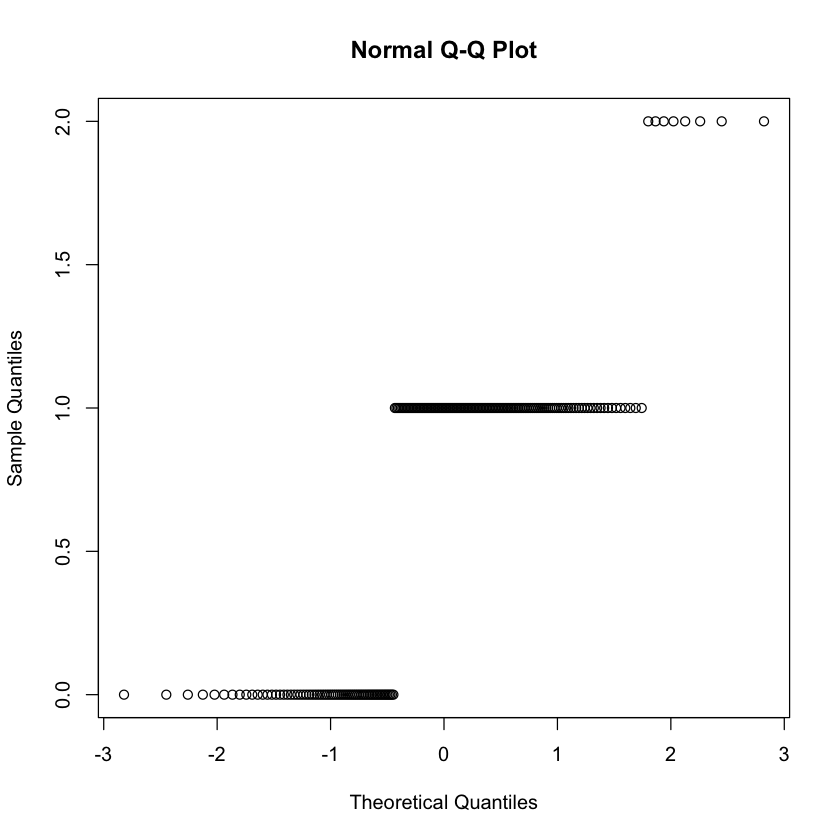

In [230]:
qqnorm(ga.data$sessions)

In [609]:
library(zoo)

In [684]:
z <- read.zoo(ga.data, header = TRUE,
              index=0:1,tz='',
              format = "%Y%m%d%H%M")

In [685]:
dat <- data.frame(Date = index(z),coredata(z))

In [708]:
dat$hour <- as.POSIXlt(dat$Date)$hour

In [893]:
dd

Date                coredata.z. hour
1   2018-11-01 00:20:00 1           0   
2   2018-11-01 00:20:00 1           0   
3   2018-11-01 00:40:00 1           0   
4   2018-11-01 00:50:00 1           0   
5   2018-11-01 00:50:00 1           0   
6   2018-11-01 00:50:00 1           0   
7   2018-11-01 01:00:00 1           1   
8   2018-11-01 01:30:00 1           1   
9   2018-11-01 01:50:00 1           1   
10  2018-11-01 02:00:00 1           2   
11  2018-11-01 02:40:00 1           2   
12  2018-11-01 03:00:00 1           3   
13  2018-11-01 03:20:00 1           3   
14  2018-11-01 04:50:00 1           4   
15  2018-11-01 05:00:00 1           5   
16  2018-11-01 05:30:00 2           5   
17  2018-11-01 05:30:00 1           5   
18  2018-11-01 05:30:00 1           5   
19  2018-11-01 06:20:00 1           6   
20  2018-11-01 06:30:00 1           6   
21  2018-11-01 06:50:00 1           6   
22  2018-11-01 07:00:00 1           7   
23  2018-11-01 07:00:00 1           7   
24  2018-11-01 07:10:00 2           7   
25  2018-11-01 08:00:00 1           8   
26  2018-11-01 08:20:00 1           8   
27  2018-11-01 08:30:00 1           8   
28  2018-11-01 08:40:00 1           8   
29  2018-11-01 08:50:00 1           8   
30  2018-11-01 09:00:00 1           9   
⋮   ⋮                   ⋮           ⋮   
91  2018-11-01 18:50:00 1           18  
92  2018-11-01 19:00:00 1           19  
93  2018-11-01 19:10:00 1           19  
94  2018-11-01 19:10:00 1           19  
95  2018-11-01 19:30:00 1           19  
96  2018-11-01 19:30:00 2           19  
97  2018-11-01 19:40:00 1           19  
98  2018-11-01 19:50:00 1           19  
99  2018-11-01 19:50:00 1           19  
100 2018-11-01 20:20:00 1           20  
101 2018-11-01 20:20:00 2           20  
102 2018-11-01 20:30:00 1           20  
103 2018-11-01 20:50:00 1           20  
104 2018-11-01 20:50:00 1           20  
105 2018-11-01 21:00:00 1           21  
106 2018-11-01 21:10:00 1           21  
107 2018-11-01 21:20:00 1           21  
108 2018-11-01 21:30:00 1           21  
109 2018-11-01 21:30:00 1           21  
110 2018-11-01 21:40:00 1           21  
111 2018-11-01 21:40:00 1           21  
112 2018-11-01 21:40:00 1           21  
113 2018-11-01 21:50:00 1           21  
114 2018-11-01 22:00:00 1           22  
115 2018-11-01 22:10:00 1           22  
116 2018-11-01 22:50:00 1           22  
117 2018-11-01 23:00:00 1           23  
118 2018-11-01 23:30:00 1           23  
119 2018-11-01 23:50:00 1           23  
120 2018-11-01 23:50:00 1           23

In [880]:
dd <- dat %>% group_by(Date=floor_date(Date, "10 mins")) 
paste(as.POSIXlt(dd$Date)$hour, as.POSIXlt(dd$Date)$min, sep=':')

[1] "0:20"  "0:20"  "0:40"  "0:50"  "0:50"  "0:50"  "1:0"   "1:30"  "1:50" 
 [10] "2:0"   "2:40"  "3:0"   "3:20"  "4:50"  "5:0"   "5:30"  "5:30"  "5:30" 
 [19] "6:20"  "6:30"  "6:50"  "7:0"   "7:0"   "7:10"  "8:0"   "8:20"  "8:30" 
 [28] "8:40"  "8:50"  "9:0"   "9:10"  "9:20"  "9:30"  "9:40"  "9:40"  "9:40" 
 [37] "9:50"  "10:0"  "10:10" "10:20" "10:20" "10:20" "10:20" "10:30" "10:40"
 [46] "10:50" "10:50" "11:0"  "11:0"  "11:20" "11:30" "11:30" "11:40" "11:40"
 [55] "11:50" "11:50" "12:10" "12:50" "13:0"  "13:10" "13:20" "13:30" "13:30"
 [64] "13:30" "13:50" "14:0"  "14:20" "14:30" "14:40" "15:0"  "15:0"  "15:0" 
 [73] "15:0"  "15:10" "15:40" "15:40" "15:50" "16:20" "16:20" "16:20" "16:30"
 [82] "16:30" "16:30" "16:50" "17:0"  "17:10" "17:10" "17:40" "17:40" "18:10"
 [91] "18:50" "19:0"  "19:10" "19:10" "19:30" "19:30" "19:40" "19:50" "19:50"
[100] "20:20" "20:20" "20:30" "20:50" "20:50" "21:0"  "21:10" "21:20" "21:30"
[109] "21:30" "21:40" "21:40" "21:40" "21:50" "22:0"  "22:10" "22:50" "23:0" 
[118] "23:30" "23:50" "23:50"

In [765]:
d <- dat %>% group_by(Date=floor_date(Date, "3 hours")) %>%
  summarise(
  session = sum(coredata.z.))

In [764]:
dat %>% group_by(Date=floor_date(Date, "3 hours")) %>%
  summarise(
  mean = mean(coredata.z.),
  n = n(),
  SE = sd(coredata.z.),
  t_c = qt(p = 0.975, df = n - 1),
  err = t_c * SE,
  low = mean - err,
  upr = mean + err     
  )

Date                mean     n  SE        t_c      err       low      
1 2018-11-01 00:00:00 1.000000 11 0.0000000 2.228139 0.0000000 1.0000000
2 2018-11-01 03:00:00 1.142857  7 0.3779645 2.446912 0.9248457 0.2180114
3 2018-11-01 06:00:00 1.090909 11 0.3015113 2.228139 0.6718091 0.4190999
4 2018-11-01 09:00:00 1.111111 27 0.3202563 2.055529 0.6582963 0.4528148
5 2018-11-01 12:00:00 1.076923 13 0.2773501 2.178813 0.6042940 0.4726291
6 2018-11-01 15:00:00 1.050000 20 0.2236068 2.093024 0.4680144 0.5819856
7 2018-11-01 18:00:00 1.133333 15 0.3518658 2.144787 0.7546770 0.3786563
8 2018-11-01 21:00:00 1.000000 16 0.0000000 2.131450 0.0000000 1.0000000
  upr     
1 1.000000
2 2.067703
3 1.762718
4 1.769407
5 1.681217
6 1.518014
7 1.888010
8 1.000000

In [791]:
sd(rnorm(100)) * 2
quantile(rnorm(100), probs = c(0.10, 0.95))

[1] 2.107503

10%       95% 
-1.240519  1.044851

In [792]:
# 95 квантиль больше 1.5 межквартильного размаха
quantile(d$session, probs = c(0.10, 0.95))[2] > IQR(d$session) * 1.5 #sd(d$session) * 2

95% 
TRUE

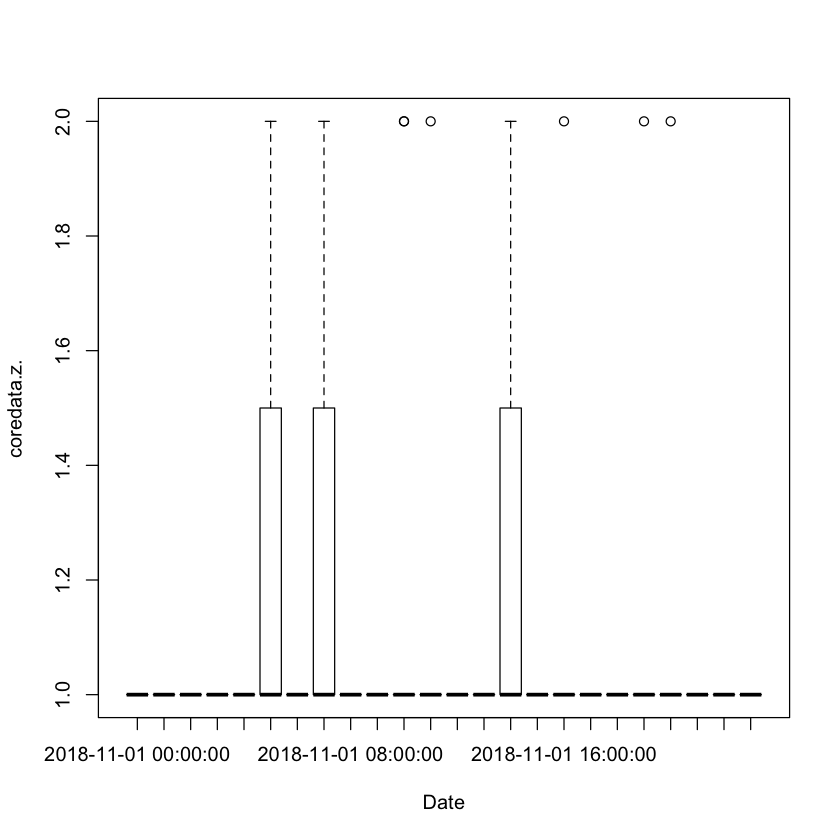

In [817]:
boxplot(coredata.z. ~ Date, dat  %>% group_by(Date=floor_date(Date, "1 hour")))

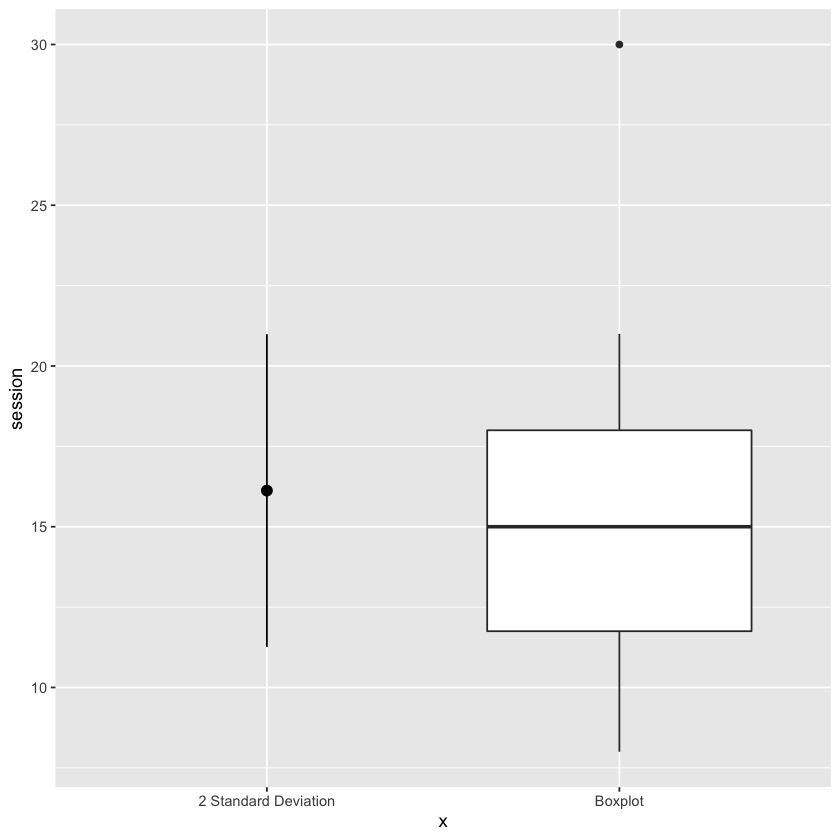

In [823]:
ggplot(data = d) +
  geom_boxplot(aes(x = 'Boxplot', y = session)) +
  stat_summary(geom = "pointrange", fun.data = mean_cl_normal, fun.args = list(mult = 2),
    aes(x = "2 Standard Deviation", y = session))

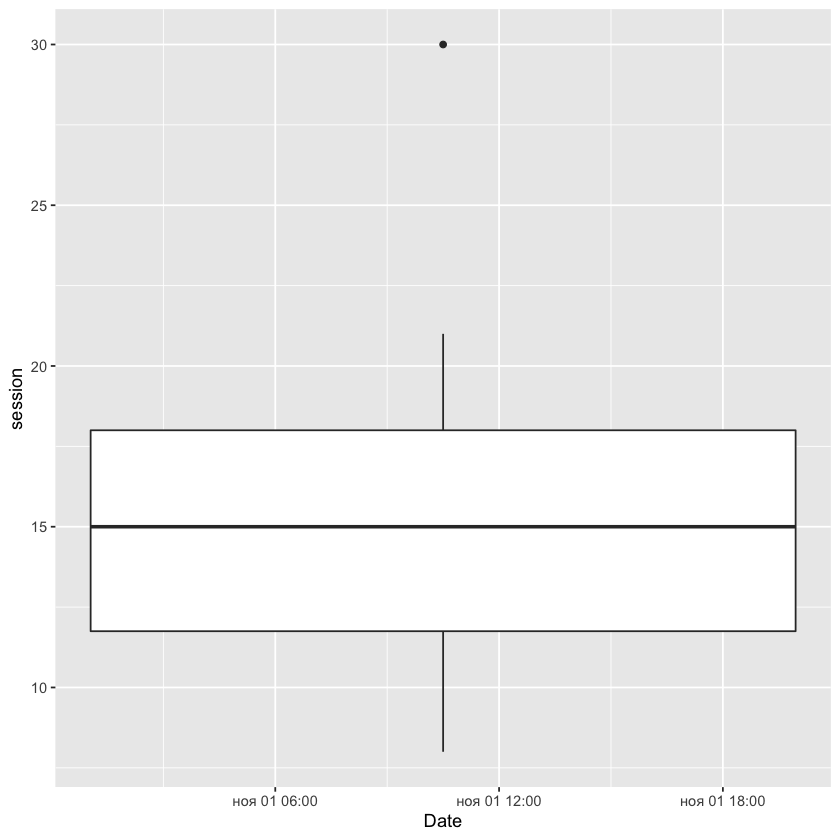

In [798]:
dat %>%
  group_by(Date=floor_date(Date, "3 hours")) %>%
    summarize(session=sum(coredata.z.)) %>% 
     ggplot(data = .) +
       geom_boxplot(aes(x = Date, y = session))

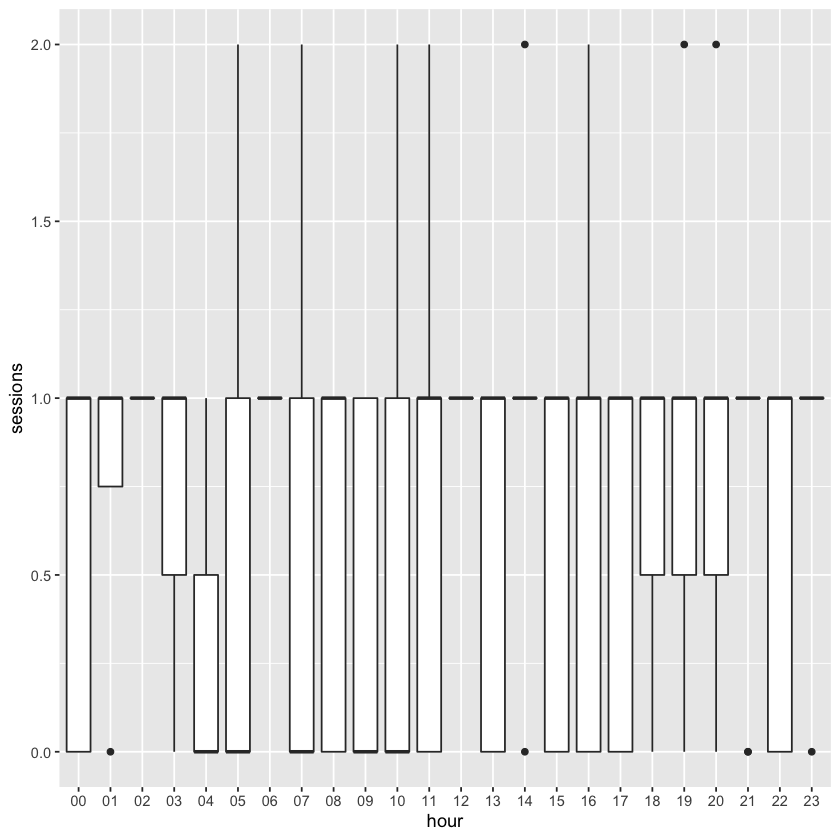

In [662]:
ggplot(data = ga.data, aes(x = hour, y = sessions)) + 
  geom_boxplot()

In [221]:
shapiro.test(rnorm(100))


	Shapiro-Wilk normality test

data:  rnorm(100)
W = 0.98354, p-value = 0.2481


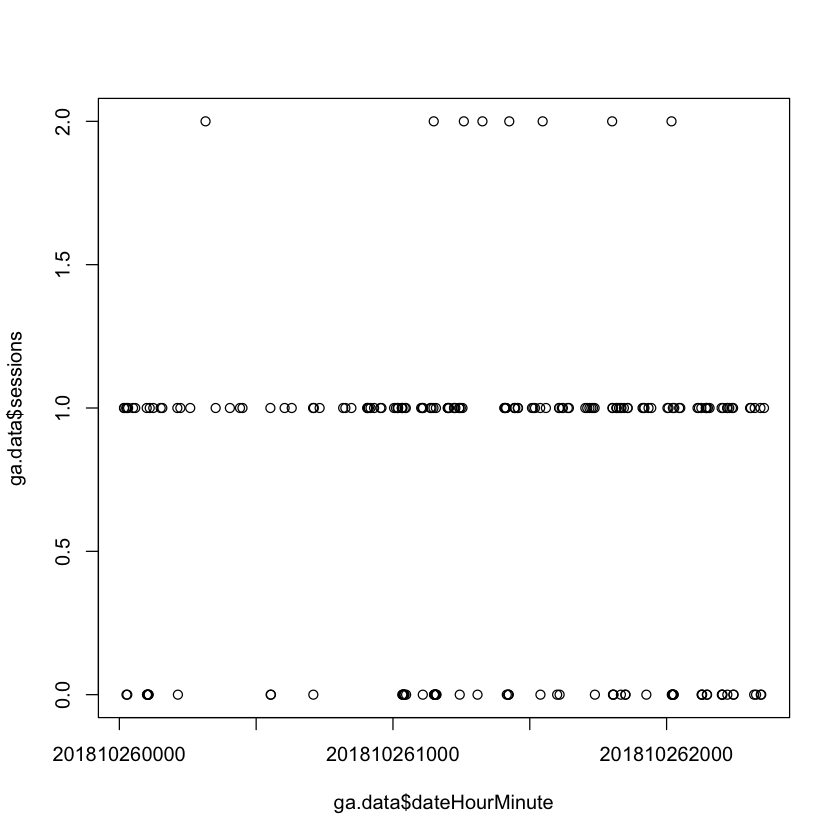

In [239]:
plot(ga.data$dateHourMinute, ga.data$sessions)

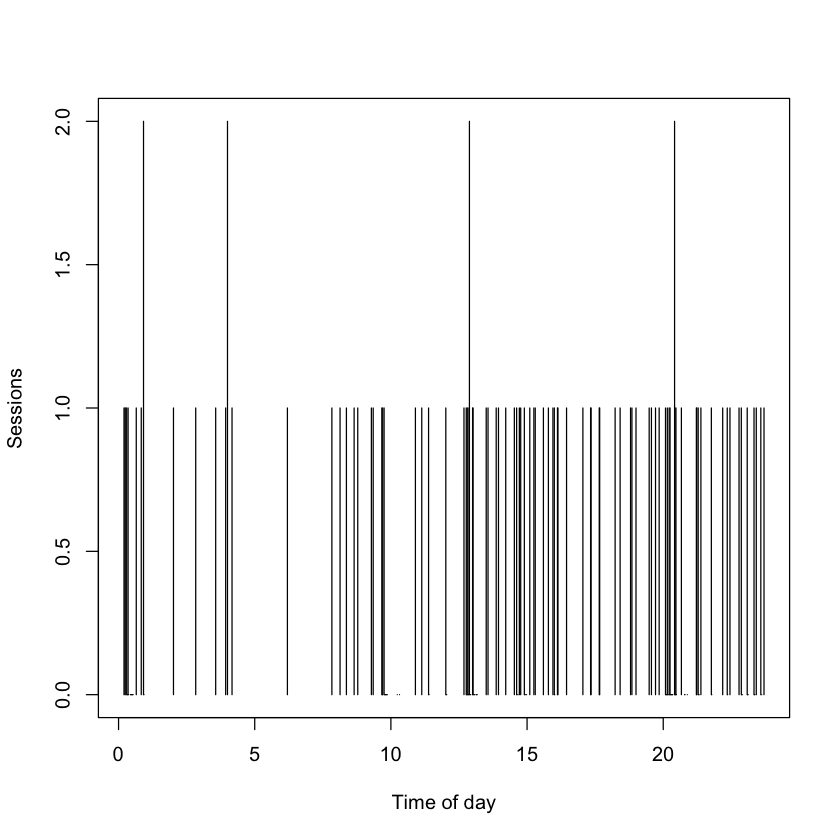

In [181]:
x <- as.numeric(ga.data$hour) + as.numeric(ga.data$minute)/60
y <- as.numeric(ga.data$sessions)

plot(x, y, type="h", xlab="Time of day", ylab="Sessions")

In [258]:
library(lubridate)

In [302]:
parse_date_time(ga.data$dateHourMinute[1], tz = "Europe/Moscow", 'ymd HM!')

[1] "2018-10-01 00:18:00 MSK"

In [308]:
ga.data$dateHourMinute <- parse_date_time(ga.data$dateHourMinute, 'ymd HM!')

In [101]:
ga.query <- QueryBuilder(query.list)
ga.data <- GetReportData(ga.query, token=oauth_token)

In [66]:
segs <- ga_segment_list()

2020-03-10 11:25:50> Fetching analytics#segments



In [267]:
install.packages("padr")

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



In [271]:
library(data.table)

In [320]:
g <- data.table(ga.data)

In [333]:
minutes(floor(as.numeric(difftime(g$dateHourMinute,ymd('1970-01-01'),units="mins"))))+ymd('1970-01-01')

    [1] "2018-10-01 00:18:00 UTC" "2018-10-01 00:25:00 UTC"
    [3] "2018-10-01 00:36:00 UTC" "2018-10-01 00:37:00 UTC"
    [5] "2018-10-01 00:56:00 UTC" "2018-10-01 00:59:00 UTC"
    [7] "2018-10-01 01:13:00 UTC" "2018-10-01 01:15:00 UTC"
    [9] "2018-10-01 05:27:00 UTC" "2018-10-01 05:28:00 UTC"
   [11] "2018-10-01 05:30:00 UTC" "2018-10-01 05:31:00 UTC"
   [13] "2018-10-01 05:34:00 UTC" "2018-10-01 05:35:00 UTC"
   [15] "2018-10-01 05:36:00 UTC" "2018-10-01 05:37:00 UTC"
   [17] "2018-10-01 05:38:00 UTC" "2018-10-01 06:39:00 UTC"
   [19] "2018-10-01 06:43:00 UTC" "2018-10-01 06:44:00 UTC"
   [21] "2018-10-01 06:46:00 UTC" "2018-10-01 06:47:00 UTC"
   [23] "2018-10-01 06:48:00 UTC" "2018-10-01 06:50:00 UTC"
   [25] "2018-10-01 06:52:00 UTC" "2018-10-01 06:53:00 UTC"
   [27] "2018-10-01 07:44:00 UTC" "2018-10-01 08:01:00 UTC"
   [29] "2018-10-01 08:02:00 UTC" "2018-10-01 08:10:00 UTC"
   [31] "2018-10-01 08:13:00 UTC" "2018-10-01 08:32:00 UTC"
   [33] "2018-10-01 08:37:00 UTC" "2018-

In [343]:
gg <- g[, sum(sessions), by=floor_date(dateHourMinute,"10min")]

In [391]:
gg[which(gg$V1 < max(gg$V1) & gg$V1 > max(gg$V1) / 2)]

floor_date          V1
1 2018-10-27 07:30:00 23
2 2018-10-30 17:50:00 24
3 2018-11-17 17:20:00 24
4 2018-11-19 17:20:00 34

Можно убрать наблюдения, которые отклоняются от 1 или 3 квартиля больше чем на 1,5 *  IQR, где  IQR  - межквартильный размах.

In [362]:
q <- quantile(gg$V1, 0.25) + quantile(gg$V1, 0.75) 

In [548]:
gg[!gg$V1 %in% boxplot.stats(gg$V1)$out]

floor_date          V1
1    2018-10-01 00:10:00 1 
2    2018-10-01 00:20:00 1 
3    2018-10-01 00:30:00 2 
4    2018-10-01 00:50:00 2 
5    2018-10-01 01:10:00 1 
6    2018-10-01 05:20:00 1 
7    2018-10-01 05:30:00 0 
8    2018-10-01 06:30:00 1 
9    2018-10-01 06:40:00 0 
10   2018-10-01 06:50:00 2 
11   2018-10-01 07:40:00 1 
12   2018-10-01 08:00:00 2 
13   2018-10-01 08:10:00 2 
14   2018-10-01 08:30:00 3 
15   2018-10-01 08:40:00 1 
16   2018-10-01 09:00:00 2 
17   2018-10-01 09:10:00 1 
18   2018-10-01 09:20:00 2 
19   2018-10-01 09:30:00 2 
20   2018-10-01 09:40:00 2 
21   2018-10-01 09:50:00 1 
22   2018-10-01 10:00:00 3 
23   2018-10-01 10:20:00 2 
24   2018-10-01 10:30:00 1 
25   2018-10-01 11:00:00 1 
26   2018-10-01 11:10:00 1 
27   2018-10-01 11:20:00 3 
28   2018-10-01 11:30:00 2 
29   2018-10-01 11:40:00 3 
30   2018-10-01 11:50:00 0 
⋮    ⋮                   ⋮ 
7768 2018-12-31 13:30:00 0 
7769 2018-12-31 13:40:00 2 
7770 2018-12-31 15:10:00 1 
7771 2018-12-31 15:20:00 1 
7772 2018-12-31 15:30:00 1 
7773 2018-12-31 15:40:00 0 
7774 2018-12-31 15:50:00 1 
7775 2018-12-31 16:10:00 2 
7776 2018-12-31 16:40:00 2 
7777 2018-12-31 17:00:00 2 
7778 2018-12-31 17:10:00 2 
7779 2018-12-31 17:30:00 1 
7780 2018-12-31 17:40:00 1 
7781 2018-12-31 18:00:00 1 
7782 2018-12-31 18:30:00 2 
7783 2018-12-31 18:40:00 1 
7784 2018-12-31 18:50:00 1 
7785 2018-12-31 19:10:00 2 
7786 2018-12-31 19:40:00 1 
7787 2018-12-31 19:50:00 1 
7788 2018-12-31 20:10:00 2 
7789 2018-12-31 20:20:00 1 
7790 2018-12-31 20:40:00 1 
7791 2018-12-31 21:10:00 1 
7792 2018-12-31 21:20:00 1 
7793 2018-12-31 21:30:00 1 
7794 2018-12-31 22:30:00 2 
7795 2018-12-31 22:40:00 1 
7796 2018-12-31 23:20:00 1 
7797 2018-12-31 23:40:00 1

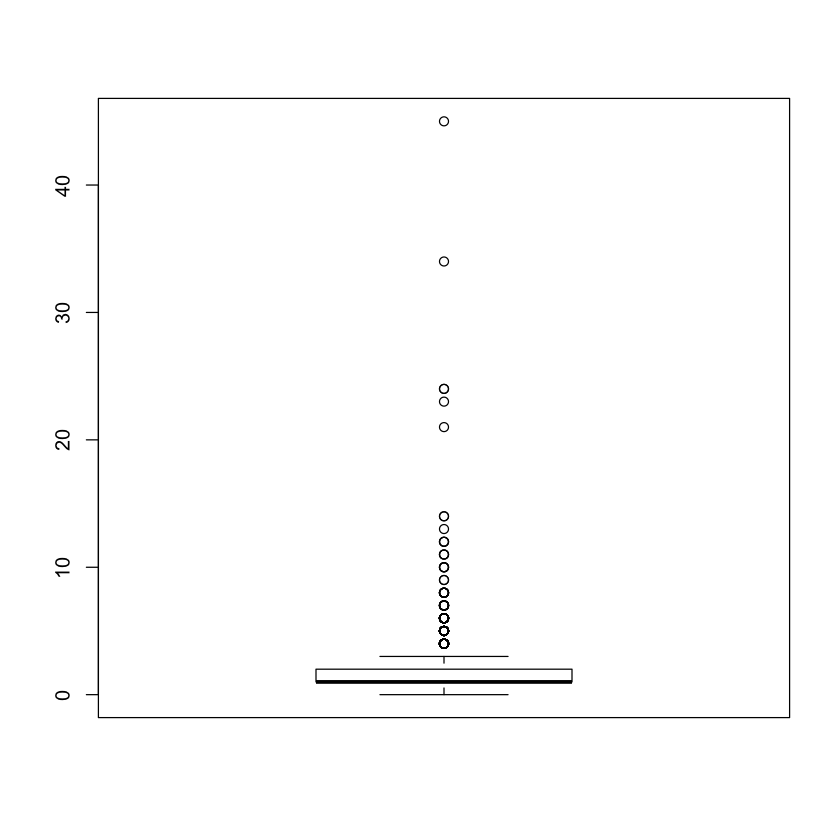

In [551]:
boxplot(gg$V1)

In [554]:
#  выбросы за пределами первого и третьего квартиля на 1,5 межквартильного размаха
all(boxplot.stats(gg$V1)$out == gg[!abs(gg$V1 - (q / 2)) <= 1.5 * IQR(gg$V1)]$V1)

[1] TRUE

In [562]:
tsoutliers(gg$V1)

$index
 [1]   26   35  301  644  731  872  928 1301 1736 2025 2232 2239 2240 2241 2242
[16] 2244 2293 2303 2304 2366 2431 2436 2517 2544 2581 2583 2626 2797 2899 3166
[31] 3416 3791 3811 4066 4260 4400 4401 4461 4497 4579 4598 4758 4967 5224 5773
[46] 6106 6523 6735 6785 6974 7149 7155 7253 7363 7516 7656 8014 8471

$replacements
 [1] 2.500000 3.500000 2.500000 1.000000 0.500000 2.500000 2.000000 1.000000
 [9] 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.500000
[17] 3.000000 1.000000 1.000000 2.000000 1.500000 4.500000 0.500000 2.000000
[25] 1.500000 1.500000 2.000000 0.500000 1.500000 3.000000 3.000000 1.000000
[33] 3.500000 1.000000 3.500000 2.333333 2.666667 2.500000 2.500000 1.500000
[41] 1.500000 1.500000 2.000000 1.500000 3.000000 4.500000 2.500000 1.000000
[49] 1.000000 1.500000 2.500000 2.000000 1.000000 2.000000 3.500000 2.000000
[57] 2.500000 1.000000

In [561]:
gg[tsoutliers(gg$V1)$index]

floor_date          V1
1  2018-10-01 10:50:00  7
2  2018-10-01 12:40:00  7
3  2018-10-04 17:30:00  6
4  2018-10-08 18:30:00  6
5  2018-10-09 17:50:00  6
6  2018-10-11 08:50:00 14
7  2018-10-11 21:10:00  8
8  2018-10-16 09:10:00  7
9  2018-10-21 14:20:00  6
10 2018-10-24 18:40:00  6
11 2018-10-27 02:00:00  9
12 2018-10-27 07:10:00 45
13 2018-10-27 07:30:00 23
14 2018-10-27 08:40:00 13
15 2018-10-27 08:50:00 12
16 2018-10-27 09:10:00 12
17 2018-10-28 05:50:00  8
18 2018-10-28 11:00:00 12
19 2018-10-28 11:20:00 11
20 2018-10-29 00:20:00  6
21 2018-10-29 16:00:00  7
22 2018-10-29 17:00:00  6
23 2018-10-30 13:10:00 14
24 2018-10-30 17:50:00 24
25 2018-10-31 01:50:00  8
26 2018-10-31 03:00:00  8
27 2018-10-31 16:20:00  6
28 2018-11-02 14:20:00  8
29 2018-11-03 16:10:00  6
30 2018-11-06 10:10:00  6
31 2018-11-08 21:10:00  8
32 2018-11-12 19:00:00  7
33 2018-11-12 22:20:00  7
34 2018-11-15 14:20:00  8
35 2018-11-17 17:20:00 24
36 2018-11-18 20:50:00  7
37 2018-11-18 21:00:00  8
38 2018-11-19 10:40:00  7
39 2018-11-19 17:20:00 34
40 2018-11-20 12:50:00 10
41 2018-11-20 16:20:00  6
42 2018-11-23 18:10:00 11
43 2018-11-25 22:00:00  7
44 2018-11-28 12:50:00 10
45 2018-12-03 21:10:00  7
46 2018-12-06 23:10:00  7
47 2018-12-10 21:10:00  8
48 2018-12-12 21:00:00 10
49 2018-12-13 09:20:00  7
50 2018-12-15 02:00:00 10
51 2018-12-16 18:00:00 21
52 2018-12-16 19:00:00  7
53 2018-12-17 17:20:00 11
54 2018-12-18 22:30:00  6
55 2018-12-20 16:10:00  6
56 2018-12-21 22:10:00  6
57 2018-12-25 21:20:00  6
58 2018-12-31 20:30:00  9

In [525]:
# вероятные выбросы, отобранные tsclean
gg[!gg$V1 %in% tsclean(gg$V1)]

floor_date          V1
1  2018-10-01 10:50:00  7
2  2018-10-01 12:40:00  7
3  2018-10-11 08:50:00 14
4  2018-10-11 21:10:00  8
5  2018-10-16 09:10:00  7
6  2018-10-27 02:00:00  9
7  2018-10-27 07:10:00 45
8  2018-10-27 07:30:00 23
9  2018-10-27 08:40:00 13
10 2018-10-27 08:50:00 12
11 2018-10-27 09:10:00 12
12 2018-10-28 05:50:00  8
13 2018-10-28 11:00:00 12
14 2018-10-28 11:20:00 11
15 2018-10-29 16:00:00  7
16 2018-10-30 13:10:00 14
17 2018-10-30 17:50:00 24
18 2018-10-31 01:50:00  8
19 2018-10-31 03:00:00  8
20 2018-11-02 14:20:00  8
21 2018-11-08 21:10:00  8
22 2018-11-12 19:00:00  7
23 2018-11-12 22:20:00  7
24 2018-11-15 14:20:00  8
25 2018-11-17 17:20:00 24
26 2018-11-18 20:50:00  7
27 2018-11-18 21:00:00  8
28 2018-11-19 10:40:00  7
29 2018-11-19 17:20:00 34
30 2018-11-20 12:50:00 10
31 2018-11-23 18:10:00 11
32 2018-11-25 22:00:00  7
33 2018-11-28 12:50:00 10
34 2018-12-03 21:10:00  7
35 2018-12-06 23:10:00  7
36 2018-12-10 21:10:00  8
37 2018-12-12 21:00:00 10
38 2018-12-13 09:20:00  7
39 2018-12-15 02:00:00 10
40 2018-12-16 18:00:00 21
41 2018-12-16 19:00:00  7
42 2018-12-17 17:20:00 11
43 2018-12-31 20:30:00  9

In [746]:
library(car)

[1]  7 29

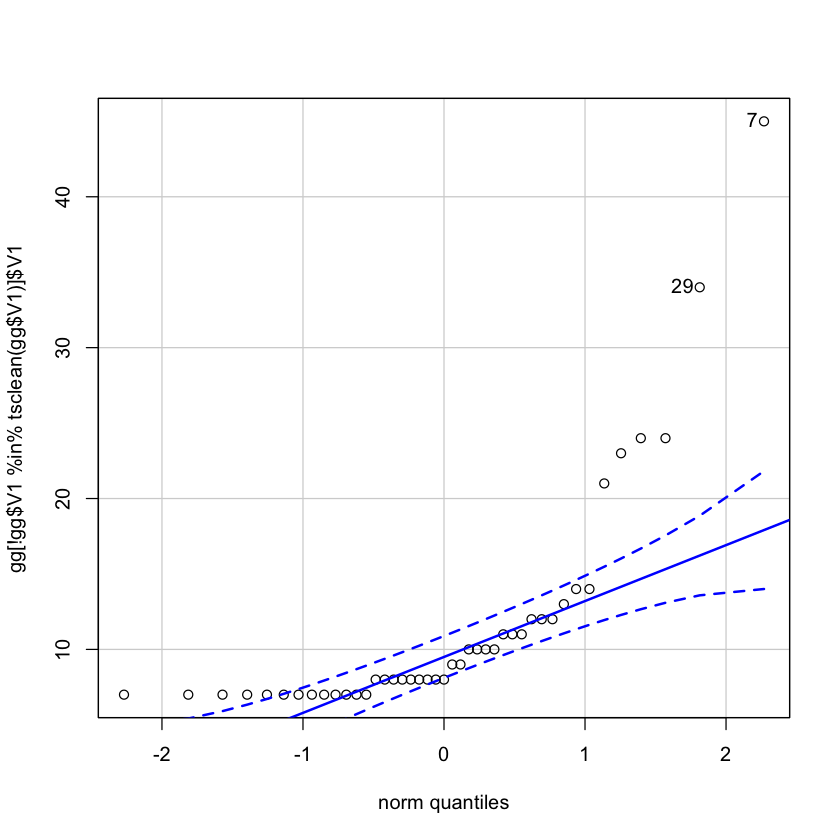

In [749]:
qqPlot(gg[!gg$V1 %in% tsclean(gg$V1)]$V1)

In [576]:
shapiro.test(gg[!gg$V1 %in% tsclean(gg$V1)]$V1)


	Shapiro-Wilk normality test

data:  gg[!gg$V1 %in% tsclean(gg$V1)]$V1
W = 0.62719, p-value = 3.23e-09


In [429]:
mlv(gg$V1, method = "mfv") # mode

[1] 1

In [441]:
max(gg$V1) - mean(gg$V1) #> 4 * sd(gg$V1)

[1] 43.25498

In [427]:
library(modeest)

In [424]:
median(gg$V1[!abs(gg$V1 - q/2) <= 2 * IQR(gg$V1)])

[1] 4

In [412]:
t.test(gg$V1[!abs(gg$V1 - q/2) <= 2 * IQR(gg$V1)])


	One Sample t-test

data:  gg$V1[!abs(gg$V1 - q/2) <= 2 * IQR(gg$V1)]
t = 46.577, df = 681, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.609452 5.015182
sample estimates:
mean of x 
 4.812317 


In [454]:
format(Sys.time(), "%H %M")

[1] "18 22"

In [513]:
rng <- new_interval("2018-10-27 07:00:00", "2018-10-27 08:00:00")          #desired range

gg[gg$floor_date %within% rng, ]

floor_date          V1
1 2018-10-27 07:00:00  1
2 2018-10-27 07:10:00 45
3 2018-10-27 07:30:00 23

In [596]:
rng2 <- new_interval("2018-10-27 09:00:00", "2018-10-27 10:00:00") 

In [590]:
gg[gg$floor_date %within% rng2]

floor_date          V1
1 2018-10-27 08:40:00 13
2 2018-10-27 08:50:00 12
3 2018-10-27 09:00:00  1
4 2018-10-27 09:10:00 12
5 2018-10-27 09:20:00  2
6 2018-10-27 09:50:00  1
7 2018-10-27 10:00:00  1

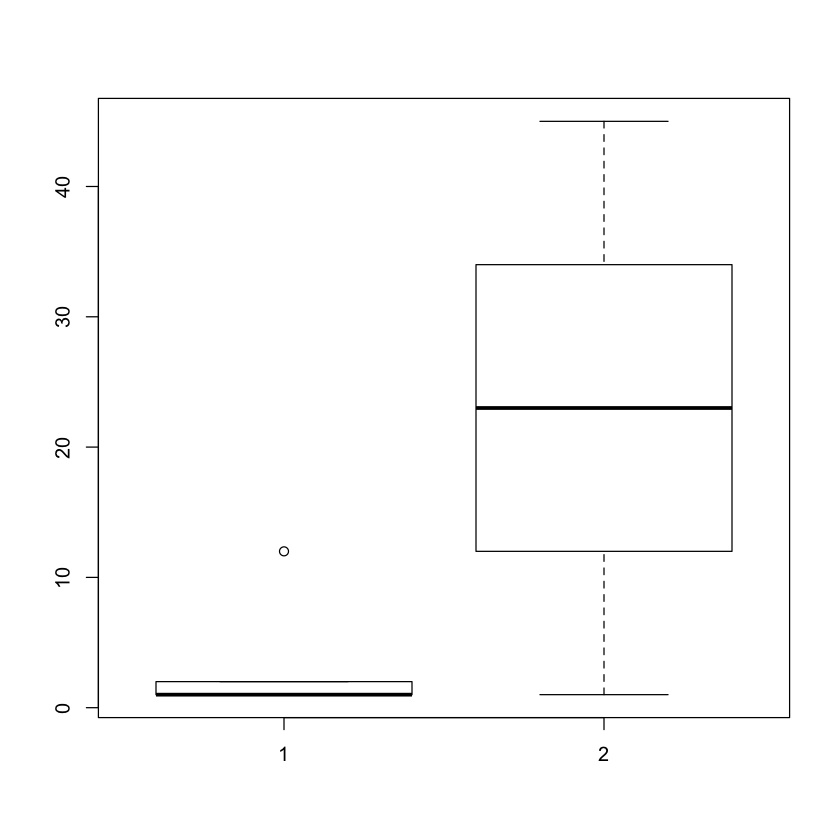

In [597]:
boxplot(gg[gg$floor_date %within% rng2]$V1, gg[gg$floor_date %within% rng]$V1)

In [474]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



In [523]:
sd(gg[gg$floor_date %within% rng, ]$V1)

[1] 22

In [521]:
abs(diff(gg[gg$floor_date %within% rng, ]$V1)) > 2 * sd(gg[gg$floor_date %within% rng, ]$V1)

[1] FALSE FALSE

In [531]:
gg[gg$floor_date %within% rng]

floor_date          V1
1 2018-10-27 07:00:00  1
2 2018-10-27 07:10:00 45
3 2018-10-27 07:30:00 23

In [504]:
sum(tsclean(gg$V1)); sum(gg$V1)

[1] 14313.5

[1] 14796

In [486]:
adf.test(diff(gg$V1, differences = 1))


	Augmented Dickey-Fuller Test

data:  diff(gg$V1, differences = 1)
Dickey-Fuller = -31.775, Lag order = 20, p-value = 0.01
alternative hypothesis: stationary


In [493]:
adf.test(gg$V1, k = 60)


	Augmented Dickey-Fuller Test

data:  gg$V1
Dickey-Fuller = -11.086, Lag order = 60, p-value = 0.01
alternative hypothesis: stationary


In [491]:
min(filter(gg, V1 > 0)$V1)

[1] 1

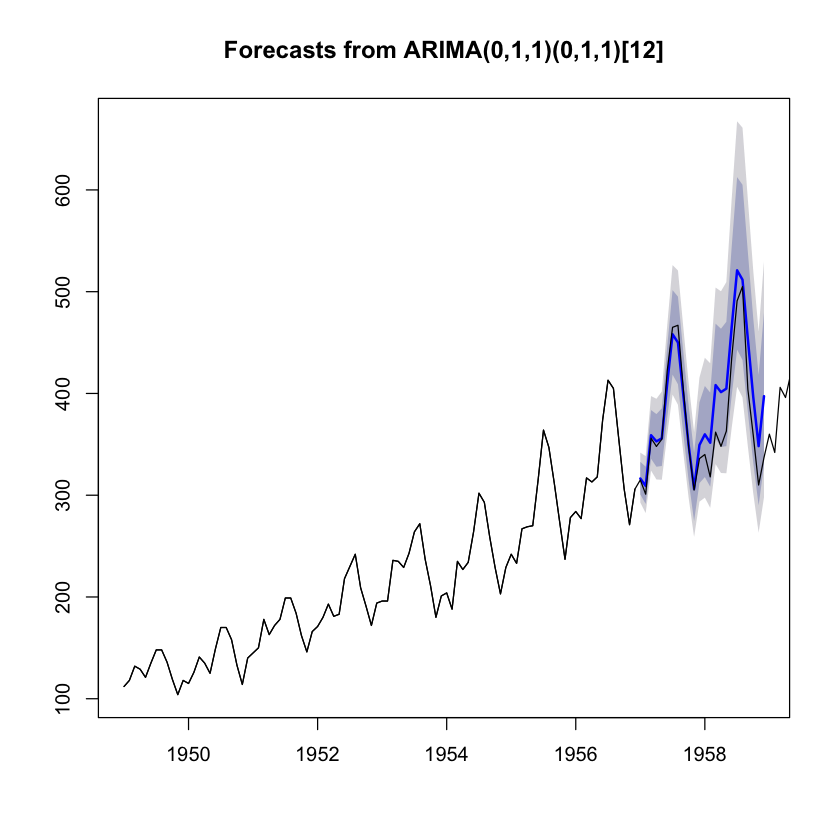

In [467]:
air.model <- Arima(window(AirPassengers,end=1956+11/12),order=c(0,1,1),
                   seasonal=list(order=c(0,1,1),period=12),lambda=0)
plot(forecast(air.model,h=24))
lines(AirPassengers)

In [512]:
gg[which(gg$V1 == max(gg$V1))]

floor_date          V1
1 2018-10-27 07:10:00 45

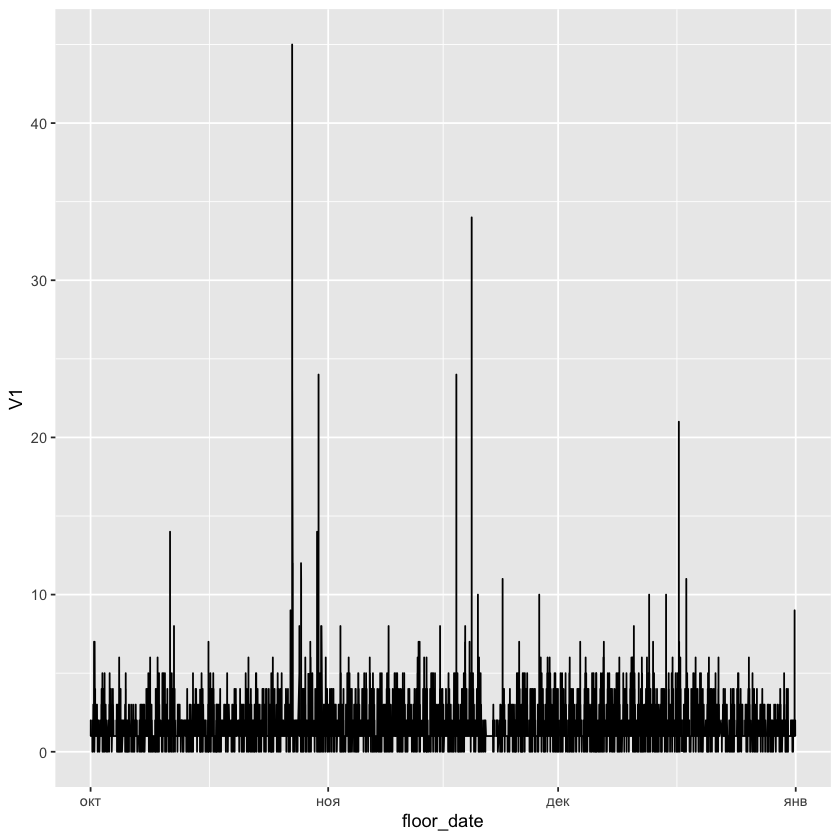

In [352]:
ggplot(data = gg, aes(x = floor_date, y = V1)) +
  geom_line()

In [342]:
# resampling for 10 min
g[, lapply(.SD, sum), by = floor_date(dateHourMinute, "10min")]

floor_date          sessions
1    2018-10-01 00:10:00 1       
2    2018-10-01 00:20:00 1       
3    2018-10-01 00:30:00 2       
4    2018-10-01 00:50:00 2       
5    2018-10-01 01:10:00 1       
6    2018-10-01 05:20:00 1       
7    2018-10-01 05:30:00 0       
8    2018-10-01 06:30:00 1       
9    2018-10-01 06:40:00 0       
10   2018-10-01 06:50:00 2       
11   2018-10-01 07:40:00 1       
12   2018-10-01 08:00:00 2       
13   2018-10-01 08:10:00 2       
14   2018-10-01 08:30:00 3       
15   2018-10-01 08:40:00 1       
16   2018-10-01 09:00:00 2       
17   2018-10-01 09:10:00 1       
18   2018-10-01 09:20:00 2       
19   2018-10-01 09:30:00 2       
20   2018-10-01 09:40:00 2       
21   2018-10-01 09:50:00 1       
22   2018-10-01 10:00:00 3       
23   2018-10-01 10:20:00 2       
24   2018-10-01 10:30:00 1       
25   2018-10-01 10:40:00 4       
26   2018-10-01 10:50:00 7       
27   2018-10-01 11:00:00 1       
28   2018-10-01 11:10:00 1       
29   2018-10-01 11:20:00 3       
30   2018-10-01 11:30:00 2       
⋮    ⋮                   ⋮       
8450 2018-12-31 13:40:00 2       
8451 2018-12-31 15:10:00 1       
8452 2018-12-31 15:20:00 1       
8453 2018-12-31 15:30:00 1       
8454 2018-12-31 15:40:00 0       
8455 2018-12-31 15:50:00 1       
8456 2018-12-31 16:10:00 2       
8457 2018-12-31 16:40:00 2       
8458 2018-12-31 17:00:00 2       
8459 2018-12-31 17:10:00 2       
8460 2018-12-31 17:30:00 1       
8461 2018-12-31 17:40:00 1       
8462 2018-12-31 18:00:00 1       
8463 2018-12-31 18:30:00 2       
8464 2018-12-31 18:40:00 1       
8465 2018-12-31 18:50:00 1       
8466 2018-12-31 19:10:00 2       
8467 2018-12-31 19:40:00 1       
8468 2018-12-31 19:50:00 1       
8469 2018-12-31 20:10:00 2       
8470 2018-12-31 20:20:00 1       
8471 2018-12-31 20:30:00 9       
8472 2018-12-31 20:40:00 1       
8473 2018-12-31 21:10:00 1       
8474 2018-12-31 21:20:00 1       
8475 2018-12-31 21:30:00 1       
8476 2018-12-31 22:30:00 2       
8477 2018-12-31 22:40:00 1       
8478 2018-12-31 23:20:00 1       
8479 2018-12-31 23:40:00 1

In [67]:
segs

id                     segmentId                   
1  -1                     gaid::-1                    
2  -2                     gaid::-2                    
3  -3                     gaid::-3                    
4  -4                     gaid::-4                    
5  -5                     gaid::-5                    
6  -6                     gaid::-6                    
7  -7                     gaid::-7                    
8  -8                     gaid::-8                    
9  -9                     gaid::-9                    
10 -10                    gaid::-10                   
11 -11                    gaid::-11                   
12 -12                    gaid::-12                   
13 -13                    gaid::-13                   
14 -14                    gaid::-14                   
15 -15                    gaid::-15                   
16 -16                    gaid::-16                   
17 -17                    gaid::-17                   
18 -18                    gaid::-18                   
19 -19                    gaid::-19                   
20 -100                   gaid::-100                  
21 -101                   gaid::-101                  
22 -102                   gaid::-102                  
23 -103                   gaid::-103                  
24 -104                   gaid::-104                  
25 -105                   gaid::-105                  
26 zkFPZVbtQSWfcBacZqi3tA gaid::zkFPZVbtQSWfcBacZqi3tA
27 zNaeUN8AQUKHs2B7rPlLIg gaid::zNaeUN8AQUKHs2B7rPlLIg
28 8Rb8C1KFS5yEaSjt3awnVQ gaid::8Rb8C1KFS5yEaSjt3awnVQ
29 dh6sRwyVQeKAwSeMvBd6iQ gaid::dh6sRwyVQeKAwSeMvBd6iQ
30 bcClesOOSrWMisSrmSEDSA gaid::bcClesOOSrWMisSrmSEDSA
31 ksQR25ANQlS9Du5WfjvQsQ gaid::ksQR25ANQlS9Du5WfjvQsQ
32 ThoV5TfSQ3eYeW7XHCuETw gaid::ThoV5TfSQ3eYeW7XHCuETw
   name                                   
1  All Users                              
2  New Users                              
3  Returning Users                        
4  Paid Traffic                           
5  Organic Traffic                        
6  Search Traffic                         
7  Direct Traffic                         
8  Referral Traffic                       
9  Sessions with Conversions              
10 Sessions with Transactions             
11 Mobile and Tablet Traffic              
12 Non-bounce Sessions                    
13 Tablet Traffic                         
14 Mobile Traffic                         
15 Tablet and Desktop Traffic             
16 Android Traffic                        
17 iOS Traffic                            
18 Other Traffic (Neither iOS nor Android)
19 Bounced Sessions                       
20 Single Session Users                   
21 Multi-session Users                    
22 Converters                             
23 Non-Converters                         
24 Made a Purchase                        
25 Performed Site Search                  
26 Yandex.Direct                          
27 ~ Главная страница                     
28 Исключить Роботов                      
29 Каталог                                
30 Межкомнатные двери                     
31 Поисковые запросы 3-4 слова            
32 Яндекс                                 
   definition                                                                                                   
1                                                                                                               
2  sessions::condition::ga:userType==New Visitor                                                                
3  sessions::condition::ga:userType==Returning Visitor                                                          
4  sessions::condition::ga:medium=~^(cpc|ppc|cpa|cpm|cpv|cpp)$                                                  
5  sessions::condition::ga:medium==organic                                                                      
6  sessions::condition::ga:medium=~^(cpc|ppc|cpa|cpm|cpv|cpp|organic)$                     

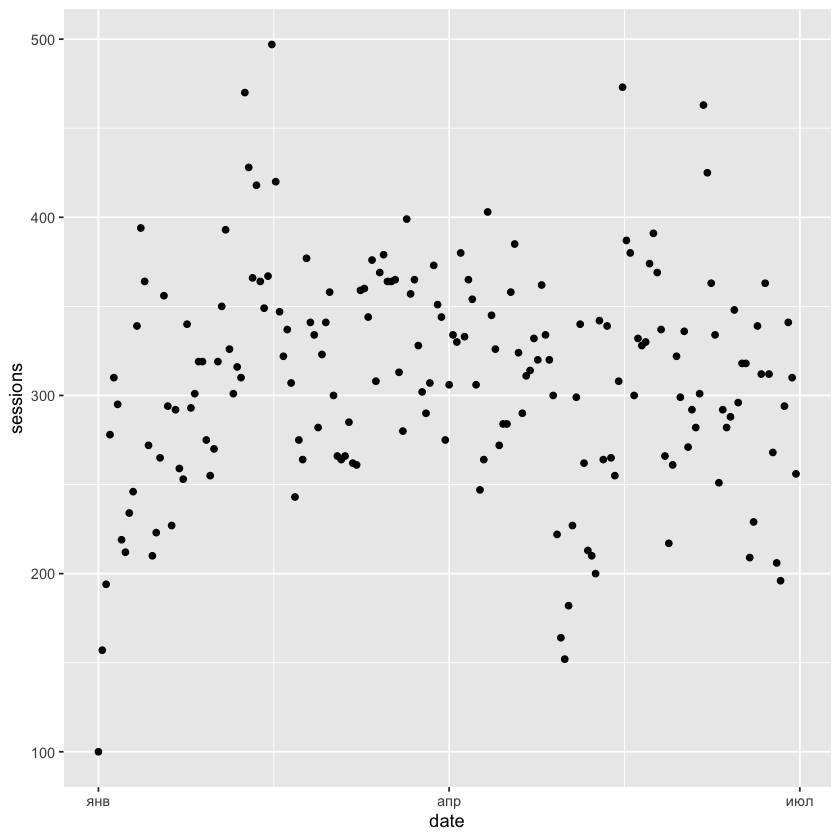

In [119]:
ggplot(gadata, aes(x=date, y=sessions)) + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



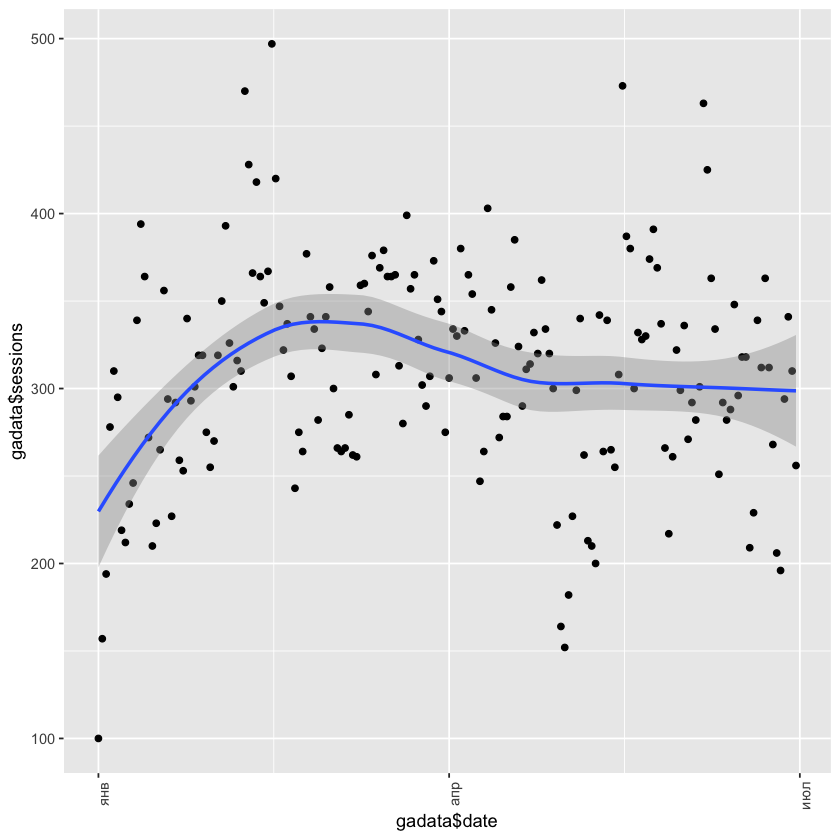

In [120]:
ggplot(data = gadata, aes(x = gadata$date,y = gadata$sessions) ) + geom_point() + geom_smooth() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [129]:
gadata <- google_analytics(ga_id, date_range = c('2016-01-01', '2016-06-30'), 
  metrics = c("sessions", "avgSessionDuration"),
  dimensions = c("dayOfWeek","date"),
  max = 5000)

2020-02-18 00:30:54> Downloaded [182] rows from a total of [182].



In [130]:
gadata

dayOfWeek date       sessions avgSessionDuration
1   0         2016-01-03 194      153.9485          
2   0         2016-01-10 246      190.9756          
3   0         2016-01-17 265      134.5623          
4   0         2016-01-24 340      166.5088          
5   0         2016-01-31 270      178.9926          
6   0         2016-02-07 310      165.8129          
7   0         2016-02-14 367      137.5777          
8   0         2016-02-21 243      152.7366          
9   0         2016-02-28 323      162.1053          
10  0         2016-03-06 285      141.6070          
11  0         2016-03-13 308      138.4968          
12  0         2016-03-20 280      160.4714          
13  0         2016-03-27 307      133.2606          
14  0         2016-04-03 330      181.3303          
15  0         2016-04-10 264      149.6174          
16  0         2016-04-17 358      151.5000          
17  0         2016-04-24 320      111.5750          
18  0         2016-05-01 152      137.1316          
19  0         2016-05-08 210      137.9333          
20  0         2016-05-15 308      163.0292          
21  0         2016-05-22 330      137.7485          
22  0         2016-05-29 261      132.7586          
23  0         2016-06-05 301      131.1462          
24  0         2016-06-12 282      101.9645          
25  0         2016-06-19 229      179.5546          
26  0         2016-06-26 196      106.9847          
27  1         2016-01-04 278      107.4173          
28  1         2016-01-11 339      209.5015          
29  1         2016-01-18 356      164.9382          
30  1         2016-01-25 293      176.3584          
⋮   ⋮         ⋮          ⋮        ⋮                 
153 5         2016-06-03 292      172.6404          
154 5         2016-06-10 251      156.0996          
155 5         2016-06-17 318      110.0063          
156 5         2016-06-24 268      183.7575          
157 6         2016-01-02 157      128.8535          
158 6         2016-01-09 234      132.2521          
159 6         2016-01-16 223      234.7489          
160 6         2016-01-23 253      194.4190          
161 6         2016-01-30 255      117.7255          
162 6         2016-02-06 316      217.9715          
163 6         2016-02-13 349      178.7736          
164 6         2016-02-20 307      152.5798          
165 6         2016-02-27 282      153.6809          
166 6         2016-03-05 266      164.8947          
167 6         2016-03-12 376      210.5665          
168 6         2016-03-19 313      263.0064          
169 6         2016-03-26 290      159.5448          
170 6         2016-04-02 334      161.3204          
171 6         2016-04-09 247      155.8583          
172 6         2016-04-16 284      146.4331          
173 6         2016-04-23 332      152.4307          
174 6         2016-04-30 164      160.0122          
175 6         2016-05-07 213      152.1408          
176 6         2016-05-14 255      145.6745          
177 6         2016-05-21 328      137.9116          
178 6         2016-05-28 217      114.1290          
179 6         2016-06-04 282      179.7908          
180 6         2016-06-11 292      120.9658          
181 6         2016-06-18 209      164.8278          
182 6         2016-06-25 206      121.7961

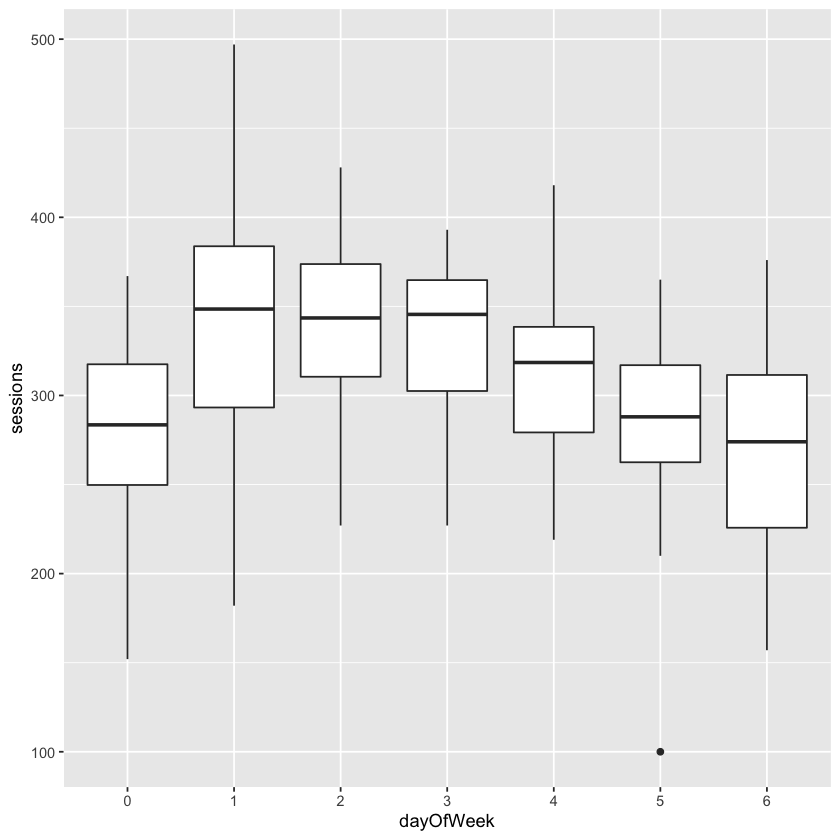

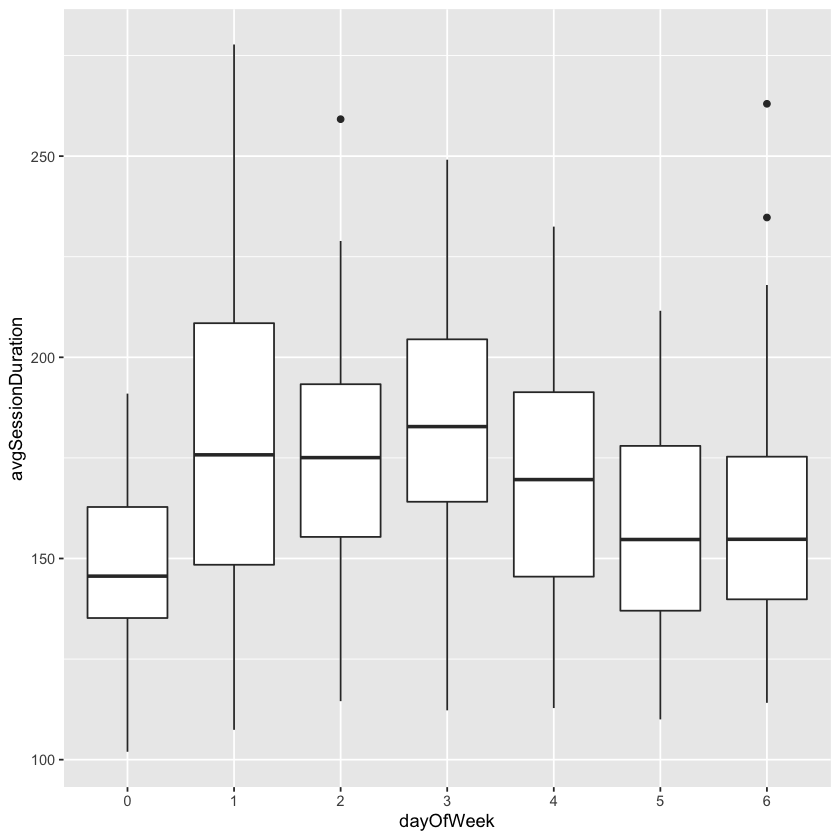

In [131]:
ggplot(data = gadata, aes(x = dayOfWeek, y = sessions)) + geom_boxplot()
ggplot(data = gadata, aes(x = dayOfWeek, y = avgSessionDuration)) + geom_boxplot()

In [134]:
library(RColorBrewer)

In [135]:
gadata <- google_analytics(ga_id, date_range=c("2016-01-01", "2016-06-30"), 
                            metrics = c("avgSessionDuration"), 
                            dimensions = c("dayOfWeekName", "hour"), max = 5000)

Auto-refreshing stale OAuth token.

2020-02-18 01:21:25> Downloaded [168] rows from a total of [168].



In [136]:
gadata$dayOfWeekName <- factor(gadata$dayOfWeekName, 
                    levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

gadata[order(gadata$dayOfWeekName),]

# Преобразование дата фрейма в xtab
heatmap_data <- xtabs(avgSessionDuration ~ dayOfWeekName + hour, data=gadata)

dayOfWeekName hour avgSessionDuration
73 Sunday        00   163.23920         
74 Sunday        01   102.48408         
75 Sunday        02    81.51282         
76 Sunday        03   108.56452         
77 Sunday        04    50.83333         
78 Sunday        05    63.77778         
79 Sunday        06   161.35484         
80 Sunday        07   143.41667         
81 Sunday        08   139.02538         
82 Sunday        09   182.18182         
83 Sunday        10   160.82390         
84 Sunday        11   139.86387         
85 Sunday        12   174.59322         
86 Sunday        13   153.24619         
87 Sunday        14   148.49765         
88 Sunday        15   127.62821         
89 Sunday        16   150.49312         
90 Sunday        17   145.09852         
91 Sunday        18   144.63457         
92 Sunday        19   127.74732         
93 Sunday        20   168.00642         
94 Sunday        21   175.21471         
95 Sunday        22   157.13462         
96 Sunday        23   128.31566         
25 Monday        00   167.38264         
26 Monday        01   134.25143         
27 Monday        02   146.41573         
28 Monday        03    92.65574         
29 Monday        04    97.44286         
30 Monday        05    48.40000         
⋮  ⋮             ⋮    ⋮                 
19 Friday        18   138.04188         
20 Friday        19   159.96338         
21 Friday        20   130.08377         
22 Friday        21   145.34069         
23 Friday        22   142.18750         
24 Friday        23   102.34603         
49 Saturday      00   192.21491         
50 Saturday      01   133.36000         
51 Saturday      02    84.94444         
52 Saturday      03    36.34615         
53 Saturday      04   125.10526         
54 Saturday      05   163.67647         
55 Saturday      06    73.58824         
56 Saturday      07   151.28182         
57 Saturday      08   191.05028         
58 Saturday      09   172.63433         
59 Saturday      10   216.75618         
60 Saturday      11   213.28982         
61 Saturday      12   214.93124         
62 Saturday      13   194.49767         
63 Saturday      14   167.13232         
64 Saturday      15   146.85545         
65 Saturday      16   130.92629         
66 Saturday      17   131.55313         
67 Saturday      18   169.18510         
68 Saturday      19   161.39012         
69 Saturday      20   149.81348         
70 Saturday      21   201.64551         
71 Saturday      22   127.41591         
72 Saturday      23   116.58511

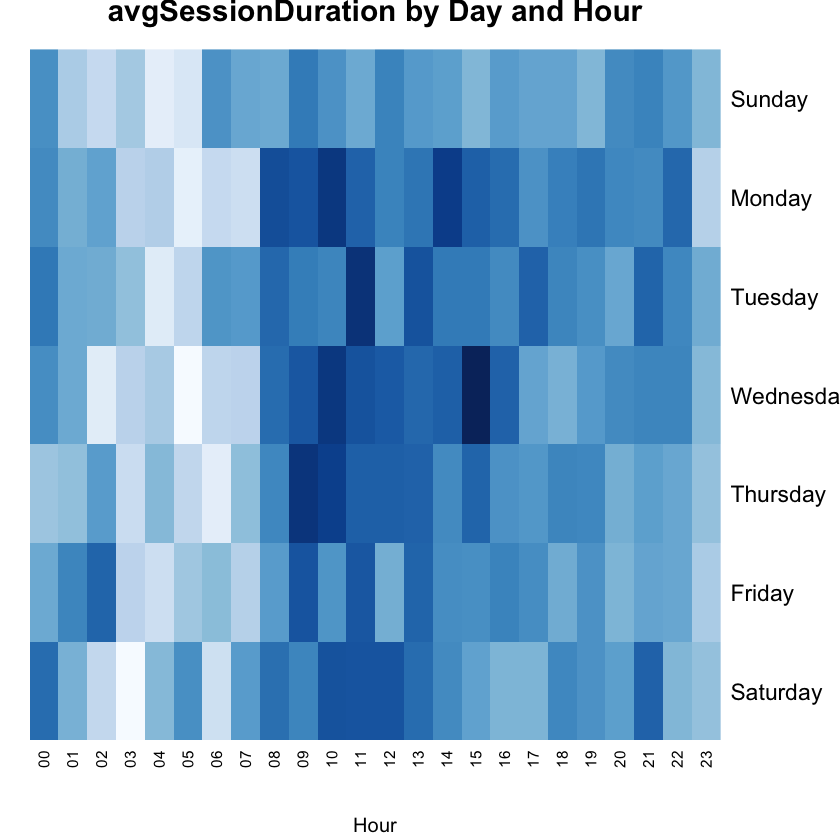

In [138]:
heatmap(heatmap_data, 
        col=colorRampPalette(brewer.pal(9,"Blues"))(100), 
        revC=TRUE,                                        
        scale="none",                                     
        Rowv=NA, Colv=NA,                                 
        main="avgSessionDuration by Day and Hour",                 
        xlab="Hour")

Auto-refreshing stale OAuth token.

2020-02-19 01:44:11> Downloaded [1641] rows from a total of [1641].



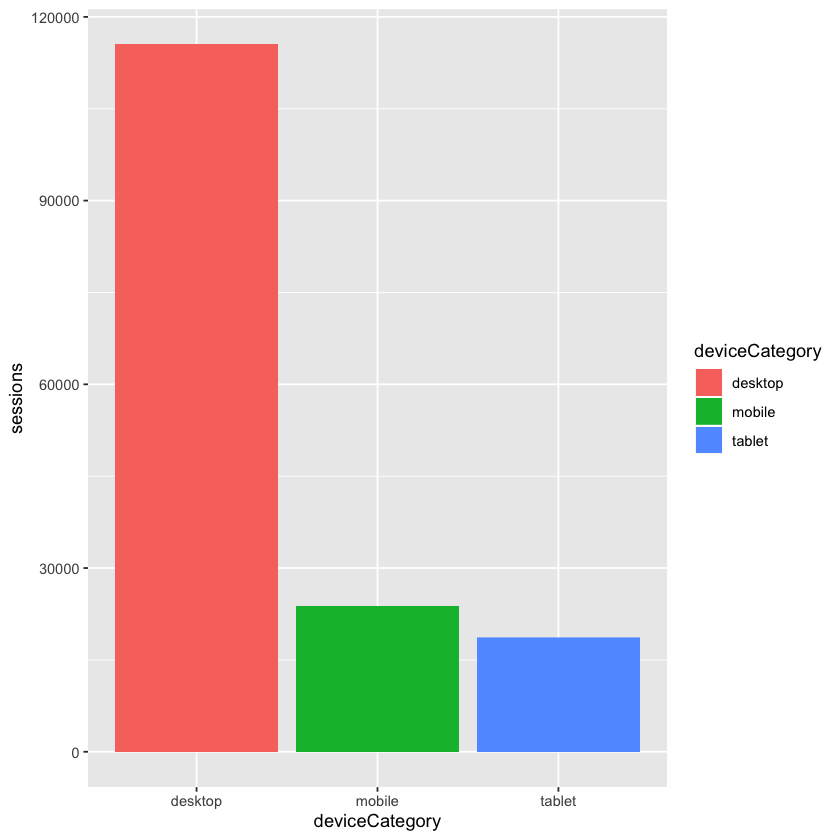

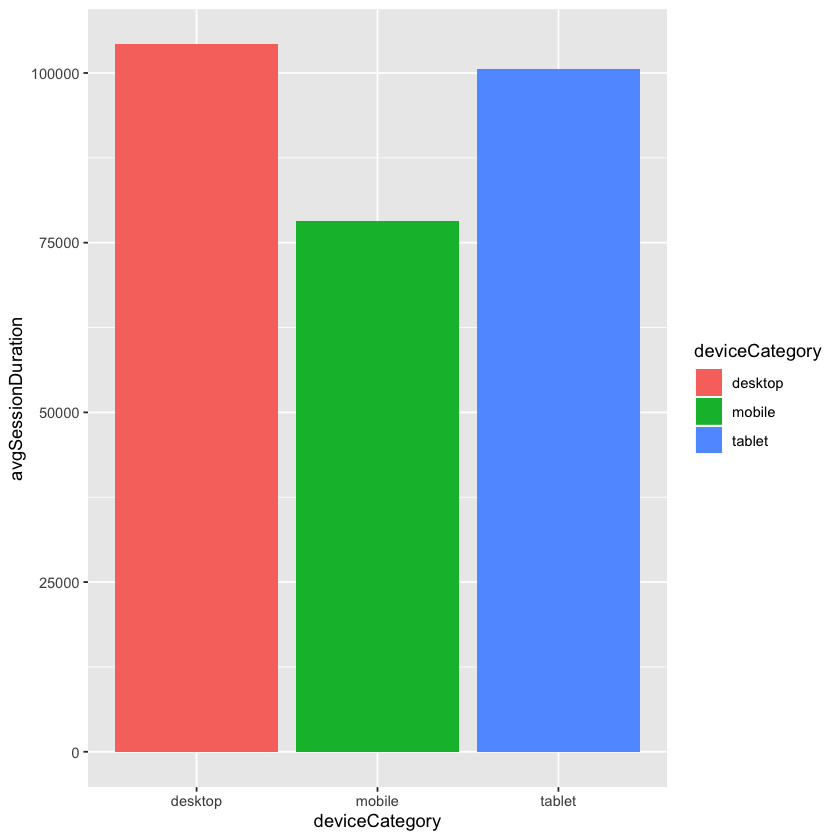

In [141]:
gadata <- google_analytics(ga_id, 
                           date_range=c("2015-01-01", "2016-06-30"), 
                           metrics = c("sessions", "avgSessionDuration"),
                           dimensions = c("date", "deviceCategory"),
                           max = 5000)


#plot sessions with deviceCategory
ggplot(gadata, aes(deviceCategory, sessions)) +   
  geom_bar(aes(fill = deviceCategory), stat="identity")

#plot avgSessionDuration with deviceCategory
ggplot(gadata, aes(deviceCategory, avgSessionDuration)) +   
  geom_bar(aes(fill = deviceCategory), stat="identity")

## Кластеризация

**Метод k-средних:** Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров

In [142]:
# download.file(url="https://raw.githubusercontent.com/michalbrys/R/master/users-segmentation/sample-users.csv",
#              "sample-users.csv", method="curl")
gadata <- read.csv("https://raw.githubusercontent.com/michalbrys/R/master/users-segmentation/sample-users.csv", header=T, row.names = 1)

In [150]:
fit$centers

beginner_pv intermediate_pv advanced_pv
1  3.628571    5.90000        32.657143  
2  7.011765   38.42353         5.023529  
3 25.530435   10.06087         4.713043

In [152]:
# clustering users in 3 groups
fit <- kmeans(gadata, 3)

# get cluster means -> fit$centers
aggregate(gadata, by=list(fit$cluster), FUN=mean)

# append  and preview cluster assignment
clustered_users <- data.frame(gadata, fit$cluster)
head(clustered_users)

# visualize results in 3D chart

#install.packages("plotly")
library(plotly)

plot_ly(clustered_users, 
        x = clustered_users$beginner_pv, 
        y = clustered_users$intermediate_pv, 
        z = clustered_users$advanced_pv, 
        type = "scatter3d", 
        mode = "markers", 
        color=factor(clustered_users$fit.cluster)
)

# write results to file
#write.csv(clustered_users, "clustered-users.csv", row.names=T)

Group.1 beginner_pv intermediate_pv advanced_pv
1 1       25.530435   10.06087         4.713043  
2 2        7.011765   38.42353         5.023529  
3 3        3.628571    5.90000        32.657143

beginner_pv intermediate_pv advanced_pv fit.cluster
103360  8          36               3          2          
103786 36           6              11          1          
104461  7          19              10          2          
104749  5           1              37          3          
109456  5           5              52          3          
115801 16           8               5          1

HTML widgets cannot be represented in plain text (need html)

In [154]:
library("forecast")
library("reshape2")
library("stats")

In [158]:
gadata <- google_analytics(ga_id, 
                           date_rang= c("2016-05-01", "2016-06-30"),
                           metrics = "sessions", 
                           dimensions = "date",
                           max = 5000)

2020-02-19 02:04:12> Downloaded [61] rows from a total of [61].



List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

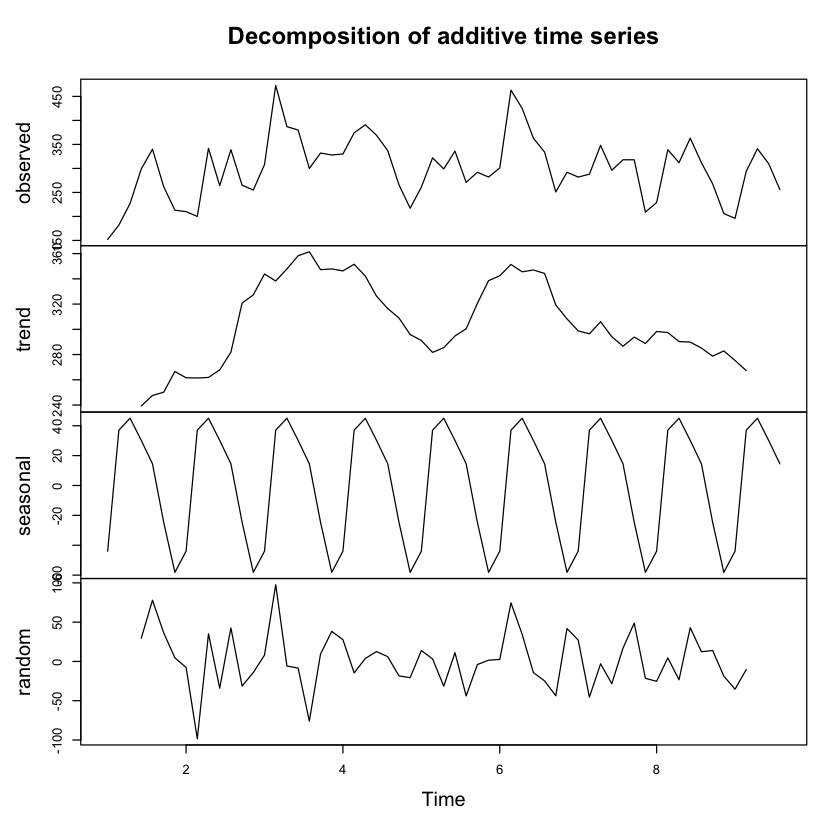

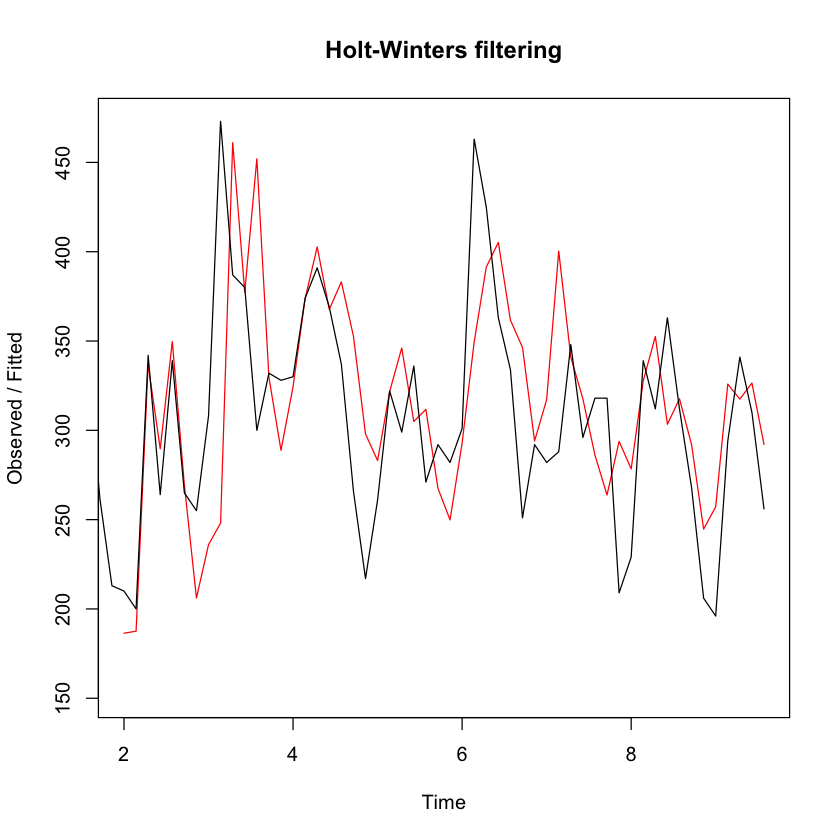

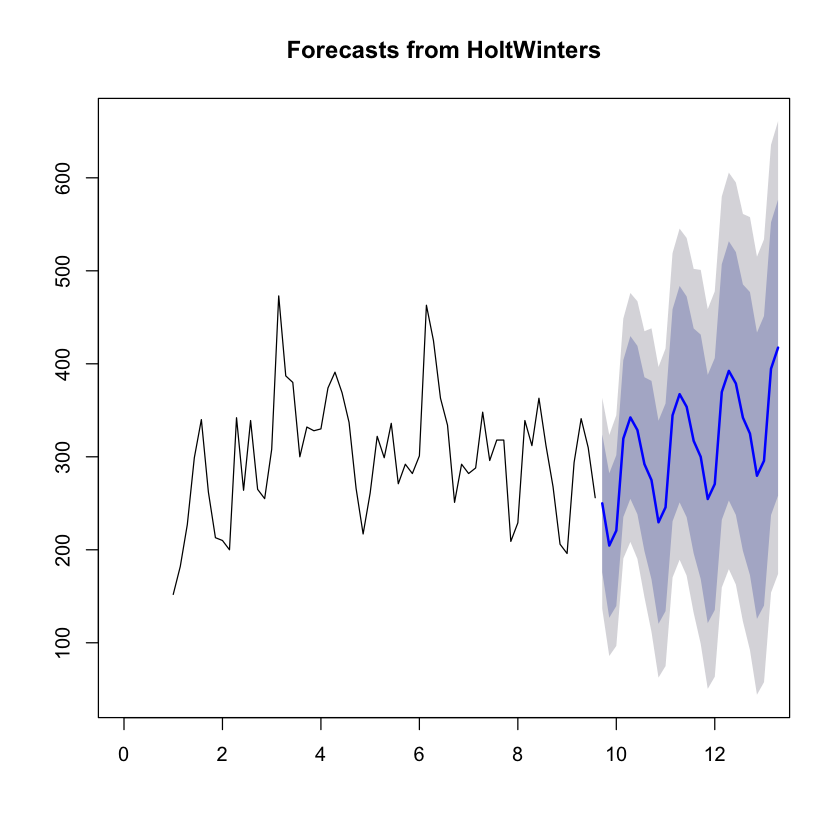

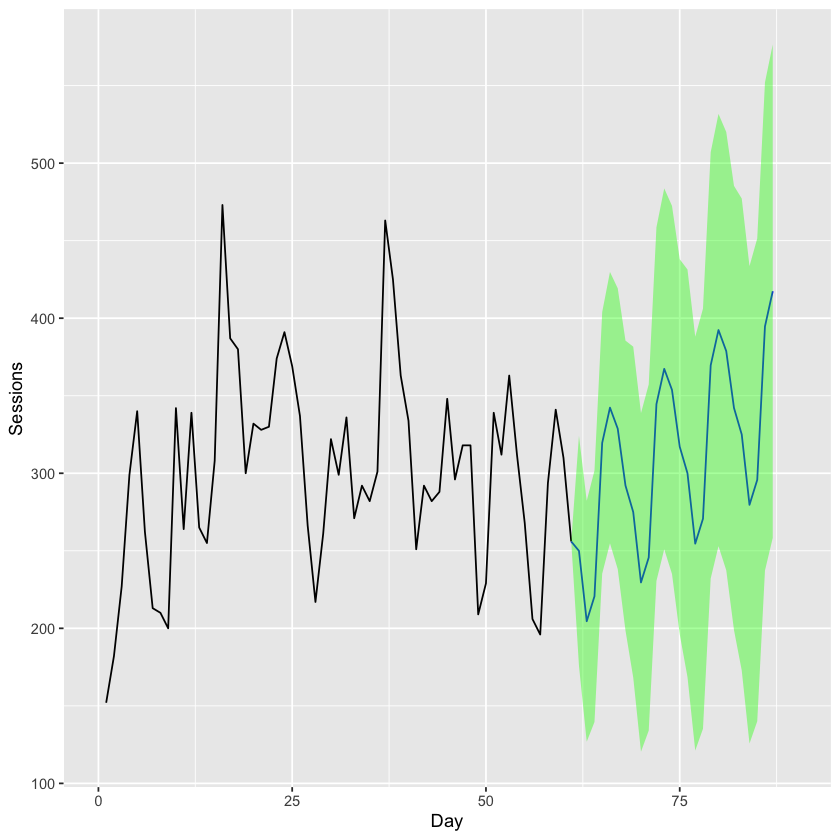

In [159]:
timeseries <- ts(gadata$sessions, frequency=7)
components <- decompose(timeseries)
plot(components)

# note the way we add a column to a data.frame
gadata$adjusted <- gadata$sessions - components$seasonal

theme(axis.text.x = element_text(angle = 90, hjust = 1))

forecastmodel <- HoltWinters(timeseries)
plot(forecastmodel)

forecast <- forecast:::forecast.HoltWinters(forecastmodel, h=26) # 26 days in future
plot(forecast, xlim=c(0,13))

forecastdf <- as.data.frame(forecast)
totalrows <- nrow(gadata) + nrow(forecastdf)
forecastdata <- data.frame(day=c(1:totalrows),
  actual=c(gadata$sessions,rep(NA,nrow(forecastdf))),
  forecast=c(rep(NA,nrow(gadata)-1),tail(gadata$sessions,1),forecastdf$"Point Forecast"),
  forecastupper=c(rep(NA,nrow(gadata)-1),tail(gadata$sessions,1),forecastdf$"Hi 80"),
  forecastlower=c(rep(NA,nrow(gadata)-1),tail(gadata$sessions,1),forecastdf$"Lo 80"))

ggplot(forecastdata, aes(x=day)) +
  geom_line(aes(y=actual), color="black") +
  geom_line(aes(y=forecast), color="blue") +
  geom_ribbon(aes(ymin=forecastlower, ymax=forecastupper), alpha=0.4, fill="green") +
  xlim(c(0, 90)) +
  xlab("Day") +
  ylab("Sessions")

**Расчтет расстояния Хи-квадрат Пирсона**

In [1]:
x <- c(18, 55, 27) # вектор наблюдений
p <- c(25, 50, 25) # вектор ожиданий

chisq.test(x, p = p, rescale.p = TRUE)


	Chi-squared test for given probabilities

data:  x
X-squared = 2.62, df = 2, p-value = 0.2698


Полевой эксперимент с условным подбрасыванием монетки

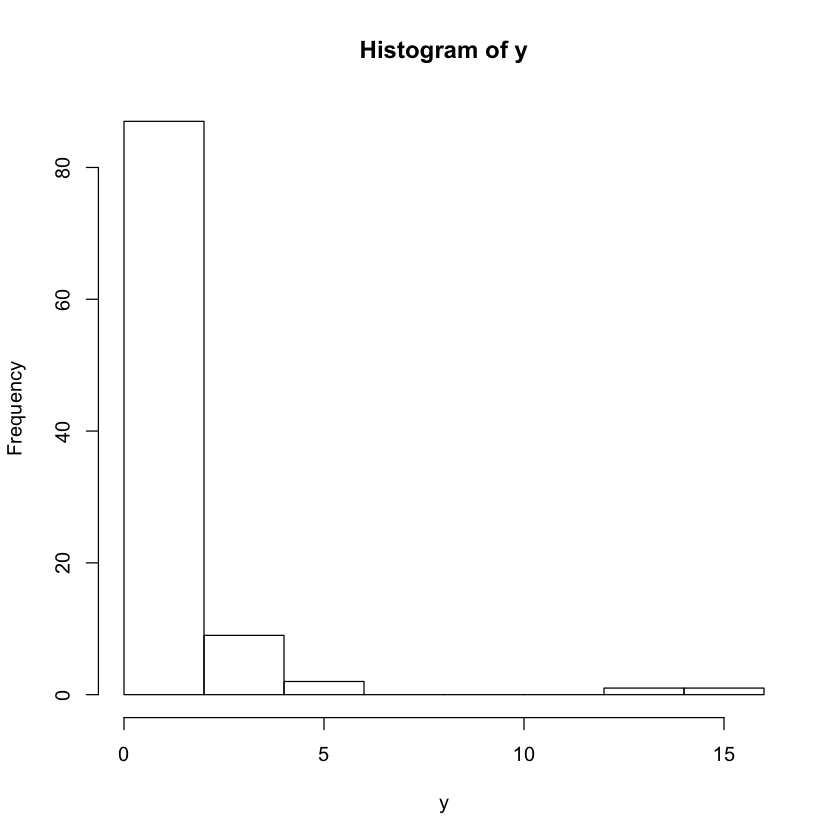

In [23]:
m <- 100
y <- rep(NA, 100)
for (i in 1:100) {
  x <- floor(runif(m, min=0, max=2))
  #x <- ifelse(x > 0.5, 1, 0)
  t <- table(x)
  p <- chisq.test(t, p = c(0.5, 0.5))
  y[i] <- p$statistic
}
hist(y)

In [15]:
patients

Yes No
Placebo 25   1
Aspirin  3  30

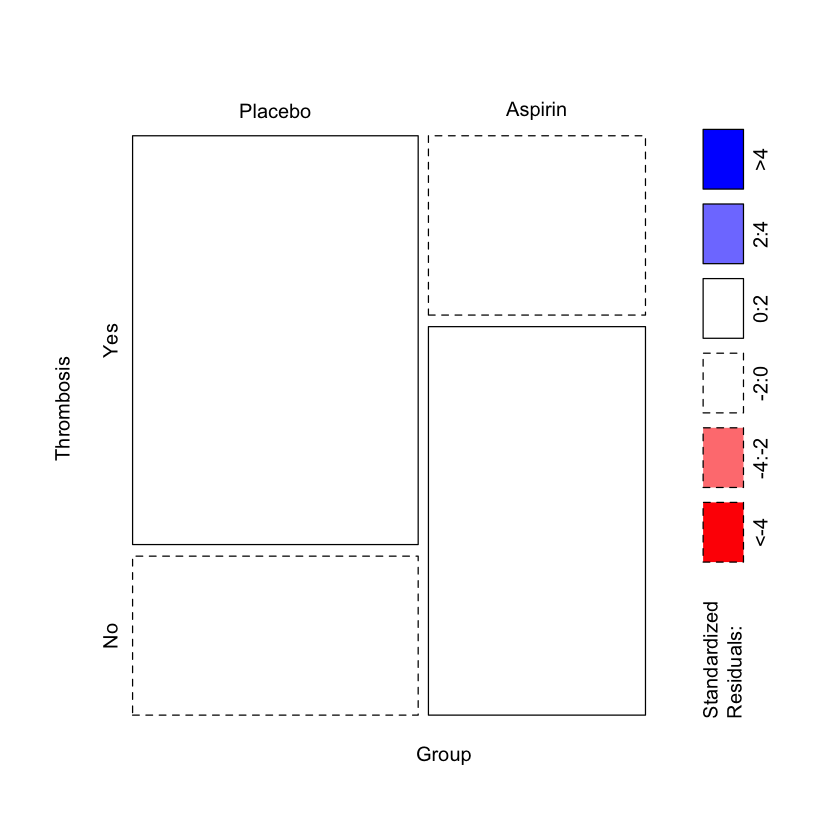

In [16]:
patients <- rbind(c(18, 7), c(6, 13))
#patients <- rbind(c(25, 1), c(3, 30))
colnames(patients) <- c("Yes", "No")
rownames(patients) <- c("Placebo", "Aspirin")
#вот график, который нам нужен
#mosaicplot(patients, color=T, shade=T, ylab="Thrombosis", xlab="Group")
#а вот так можно в точности воспроизвести рисунок, который мы видели
mosaicplot(patients, color=T, shade=T, ylab="Thrombosis", xlab="Group", cex.axis=1, main="")

In [25]:
smart.test <- function(test_data){
  test_table <- table(test_data) 
  if (min(test_table) < 5){        
    fit <- fisher.test(test_table)        
    result <- fit$p.value      
  } else {        
      fit <- chisq.test(test_table)        
      result <- c(fit$statistic, fit$parameter, fit$p.value)        
    }        
  return(result)        
}

In [18]:
test_data <- as.data.frame(list(am = c(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1), vs = c(0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1)))

In [26]:
smart.test(test_data)

X-squared        df           
0.3475355 1.0000000 0.5555115

In [28]:
library(ggplot2)

Функция smart_test получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы,  p-уровня значимости.

In [57]:
smart_test <- function(x) {
  x <- table(x)  
  if (all(x >= 5)) {
    chiq <- chisq.test(x)$statistic
    df <- chisq.test(x)$parameter
    p.value <- chisq.test(x)$p.value
    return(c(chiq, df, p.value))
  } else {
      return(fisher.test(x)$p)
  }
}

In [58]:
test_data <- as.data.frame(list(am = c(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1), vs = c(0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1)))
smart_test(test_data)

X-squared        df           
0.3475355 1.0000000 0.5555115

Функция most_significant получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность.

Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с ﻿названием переменной (или переменных), в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат. 

In [59]:
most_significant <-  function(x){
  x <- apply(sapply(x, table), 2, chisq.test)
  p.values <- sapply(x, "[[", "p.value")
  return(names(which(p.values == min(p.values))))
}

In [60]:
most_significant  <- function(test_data){    
  chisq_tests <- sapply(test_data, function(col) chisq.test(table(col))$p.value)    
  min_p  <- which(chisq_tests == min(chisq_tests))    
  return(colnames(test_data)[min_p])
}

In [61]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data.csv", stringsAsFactors = F)
most_significant(test_data)

[1] "V3"

Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

In [62]:
iris$important_cases <- apply(iris[, 1:4], 1, 
                function(x) ifelse(sum(x > sapply(iris[, 1:4], mean), na.rm = TRUE) > 2, 'Yes', 'No'))

In [63]:
importance_calc <- function(v1, v2, threshold=3){    
  ifelse(sum(v1 > v2) >= threshold, 'Yes', 'No')}    
iris$important_cases <- factor(apply(iris[1:4], 1, importance_calc, v2 = colMeans(iris[, 1:4])))

функция get_important_cases принимает на вход dataframe с произвольным числом количественных переменных (гарантируется хотя бы две переменные). Функция должна возвращать dataframe с новой переменной - фактором important_cases.

Переменная  important_cases принимает значение Yes, если для данного наблюдения больше половины количественных переменных имеют значения больше среднего. В противном случае переменная important_cases принимает значение No.

Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации. 

In [64]:
get_important_cases <- function(df){    
  threshold <- dim(df)[2] / 2
  df$important_cases <- factor(apply(df, 1, 
            function(x) ifelse(sum(x > colMeans(df)) >= threshold, 'Yes', 'No')), levels = c('Yes', 'No'))
  return(df)
}

In [65]:
get_important_cases <- function(d){    
  m <- colMeans(d)    
  compare_to_means <- apply(d, 1, function(x) as.numeric(x > m))    
  is_important <- apply(compare_to_means, 2, sum) > ncol(d)/2    
  is_important <- factor(is_important, levels = c(FALSE, TRUE), labels = c('No', 'Yes'))    
  d$important_cases <- is_important    
  return(d)
}

функция stat_mode получает на вход вектор из чисел произвольной длины и возвращает числовой вектор с наиболее часто встречаемым значением. Если наиболее часто встречаемых значений несколько, функция должна возвращать несколько значений моды  в виде числового вектора. 

In [66]:
stat_mode <- function(v) {
  uniqv <- unique(v)
  counts <- tabulate(match(v, uniqv))
  uniqv[which(counts == max(counts))]
}

In [67]:
stat_mode <- function(v){        
  mode_positions <- which(table(v) == max(table(v)))    
  as.numeric(names(table(v))[mode_positions])
}

In [68]:
v <- c(1, 1, 1, 2, 3, 3, 3)
stat_mode(v)

[1] 1 3

Функция max_resid получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.

In [75]:
max.resid <- function(x){    
  stdres <- chisq.test(table(x))$stdres 
  as.vector(unlist(data.frame(stdres)[which(stdres == max(stdres)), c(1, 2)], use.names = FALSE))
}

In [71]:
max_resid <- function(test_data){    
  d <- table(test_data)    
  chi <- chisq.test(d)    
  ind <- which(chi$stdres==max(chi$stdres), arr.ind = T)    
  return(c(row.names(d)[ind[1]],colnames(d)[ind[2]]))    
}

In [74]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")
max.resid(test_data)

[1] "drug_1"   "positive"

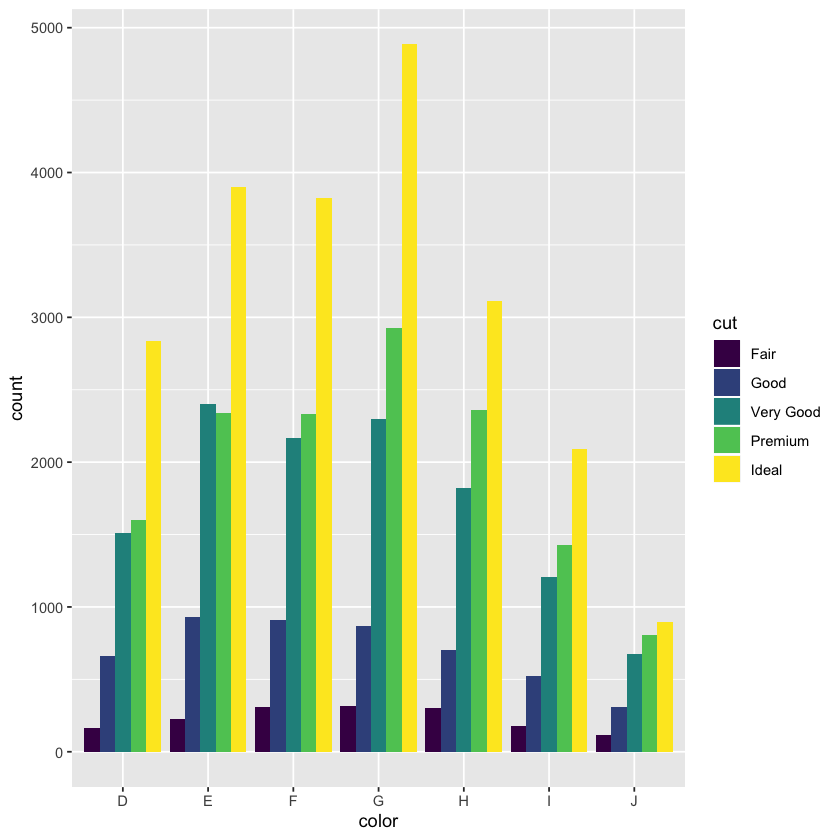

In [56]:
ggplot(diamonds, aes(x = color, fill = cut)) +
  geom_bar(position = "dodge", stat = "count")

<img src="https://ucarecdn.com/6dcfc27b-b3a0-4ada-a645-649c7911acc9/">


**Intercept** – логарифм шансов положительного исхода для женщин в первом классе.

**SexMale** — логарифм отношения шансов для мужчин в первом классе и женщин в первом классе.

**PclassSecond** — логарифм отношения шансов для женщин во втором классе и женщин в первом классе.

**PclassThird** — логарифм отношения шансов для женщин в третьем классе и женщин в первом классе.

**SexMale:PclassSecond** — разность логарифмов отношения шансов, рассчитанного для мужчин и женщин в первом классе и во втором классе.

**SexMale:PclassThird** — разность логарифмов отношения шансов рассчитанного для мужчин и женщин в первом и в третьем классе.

**Рассчитаем вероятность снять головную боль после приёма настоящего лекарства мужчиной**

Коэффициенты модели<br><br>
$$Intercept+0.80∗SexMale+B2∗ConditionPlacebo+B3∗ConditionTreatment+B4∗SexMaleConditionPlacebo+B 5∗SexMaleConditionTreatment$$

$log(p / 1-p)$

In [18]:
p <- (-1.15 + 0.80*1 + 0.82*0 + 2.13*1 + 16.11*0*1 - 0.17*1*1)

Формула расчета предсказанной вероятности
$exp(p) / (1+exp(p))$

In [21]:
exp(p) / (1 + exp(p)) # предсказанная вероятность снять головную боль

[1] 0.8334114

In [23]:
p <- (3.3081 - 3.73*1 - 0.88*0 - 3.46*1 - 0.42*1*0 + 2.15*1*1)

In [24]:
exp(p) / (1 + exp(p)) # предсказанная вероятность выжить женщине в первом классе

[1] 0.1503447

In [25]:
library(titanic)

### Взаимодействие номинативных предикторов

__Один номинативный и один количественный предиктор__

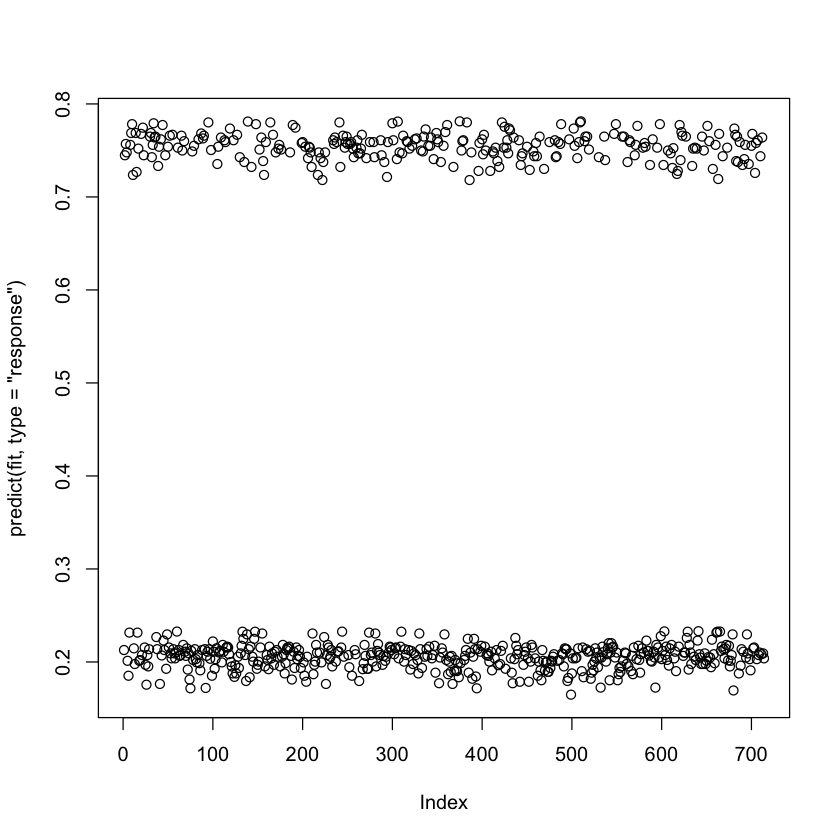

In [26]:
fit <- glm(Survived ~ Sex + Age, titanic_train, family = "binomial")
plot(predict(fit, type = 'response')) # type = response возвращает вероятность, а не логарифм

__Один количественный предиктор__

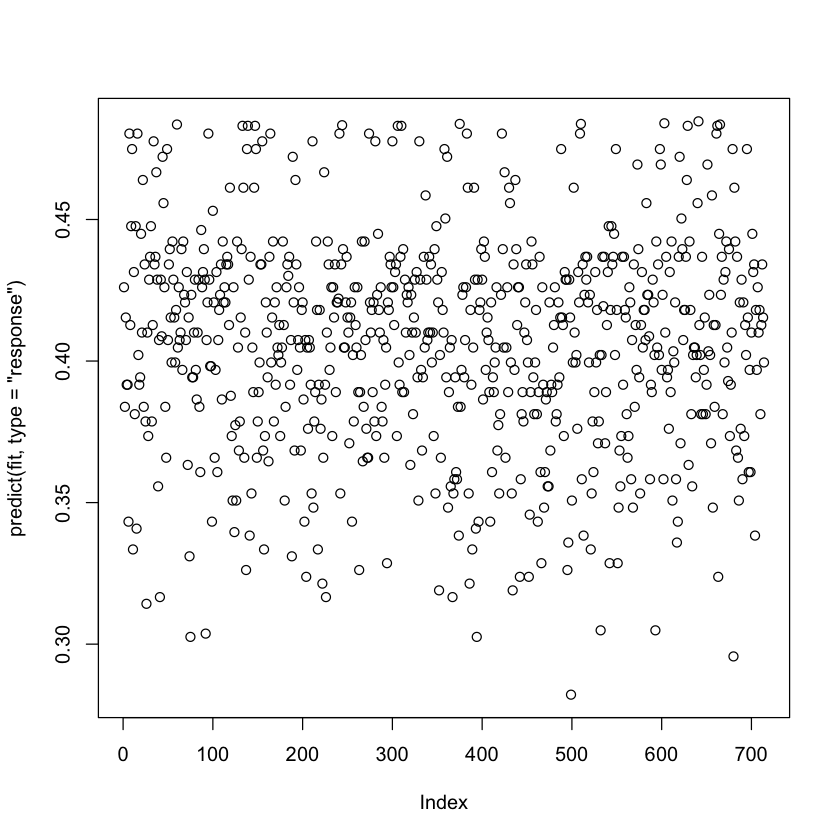

In [30]:
fit <- glm(Survived ~ Age, titanic_train, family = "binomial")
plot(predict(fit, type = 'response'))

__Один номинативный предиктор__

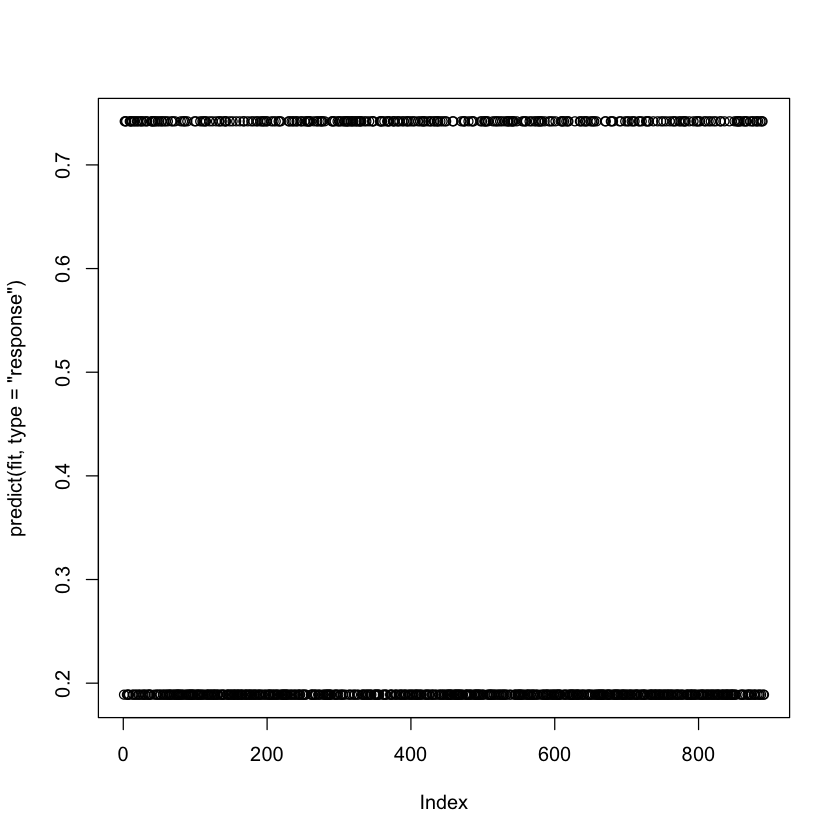

In [33]:
fit <- glm(Survived ~ Sex, titanic_train, family = "binomial")
plot(predict(fit, type = 'response'))

__Два номинативных предиктора с взаимодействием__

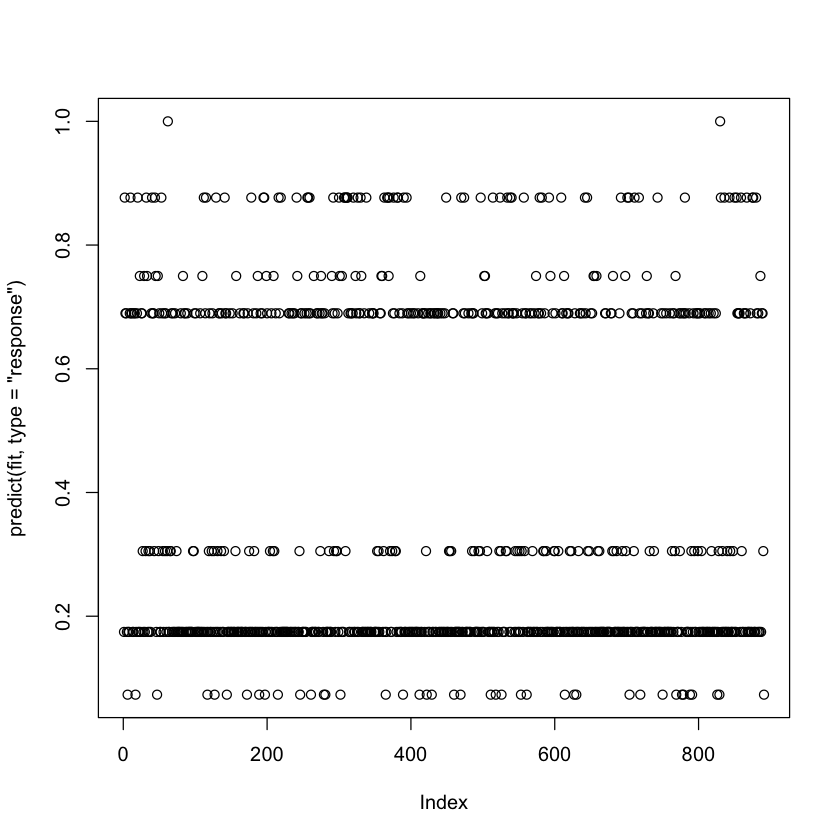

In [31]:
fit <- glm(Survived ~ Sex * Embarked, titanic_train, family = "binomial")
plot(predict(fit, type = 'response'))

__Два номинативных предиктора без взаимодействия__

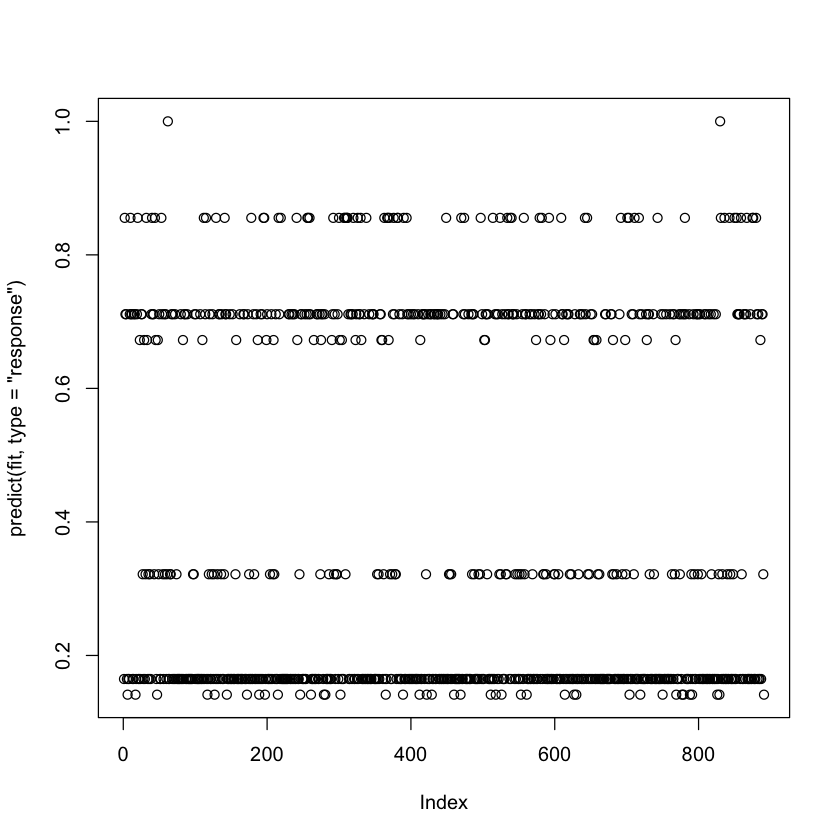

In [32]:
fit <- glm(Survived ~ Sex + Embarked, titanic_train, family = "binomial")
plot(predict(fit, type = 'response'))

__Кластерный анализ__

In [1]:
library(readxl)

In [3]:
df <- read_excel("~/Study/R/2cPK05oYEeiAaxI_EQt0HA_da25c0c09a1811e8b971e53202445fc9_______.xlsx")

In [4]:
orders.max <- apply(df[, 2:5], 2, max)
orders.min <- apply(df[, 2:5], 2, min)

In [5]:
orders.scaled <- scale(df[, 2:5], center = orders.min, scale = orders.max-orders.min)

Автоматическое разбиение данных на 3 кластера

In [6]:
clust.orders <- hclust(dist(orders.scaled), "ward.D2")
clusters <- cutree(clust.orders, k=3) 

In [7]:
df$groups <- clusters

In [8]:
clusterd.df <- data.frame(df[, 1], clusters)

In [9]:
names(clusterd.df) <- c("client.id", "clusters")

Дендрограмма

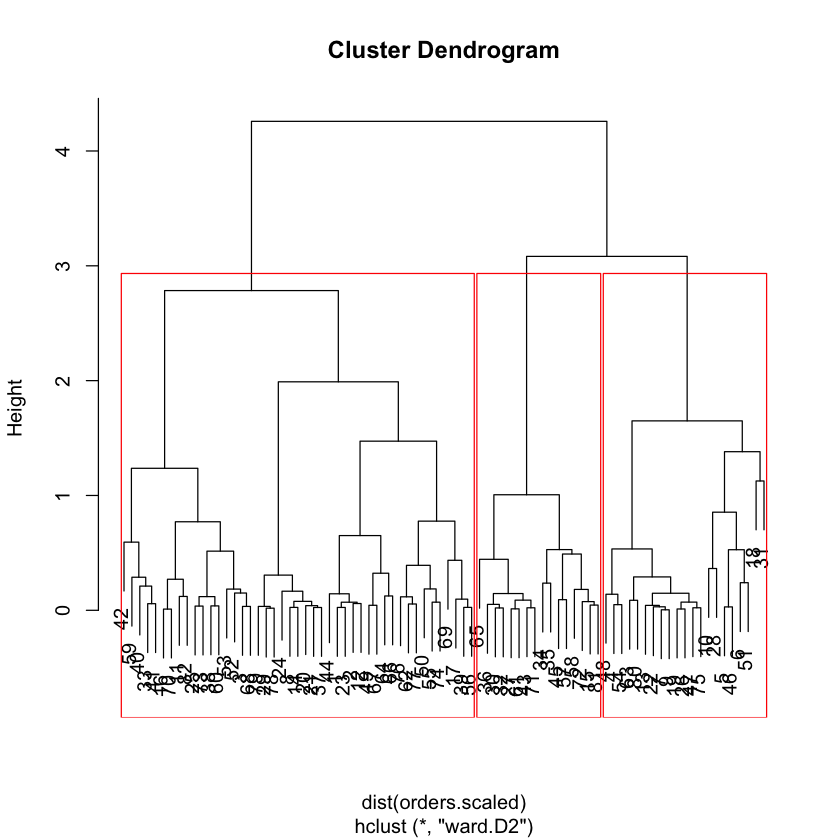

In [9]:
plot(clust.orders)
rect.hclust(clust.orders, k=3, border="red")

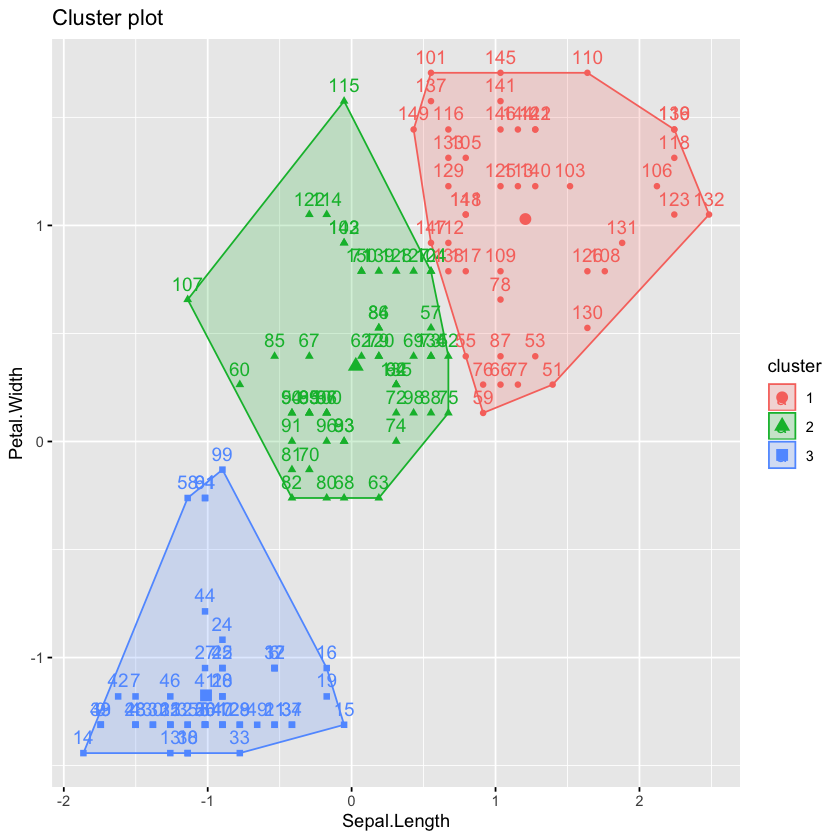

In [2]:
library(factoextra)
theme_set(theme_minimal())
d <- iris[, c("Sepal.Length", "Petal.Width")]
fit <- kmeans(d, 3)
fviz_cluster(fit, d)

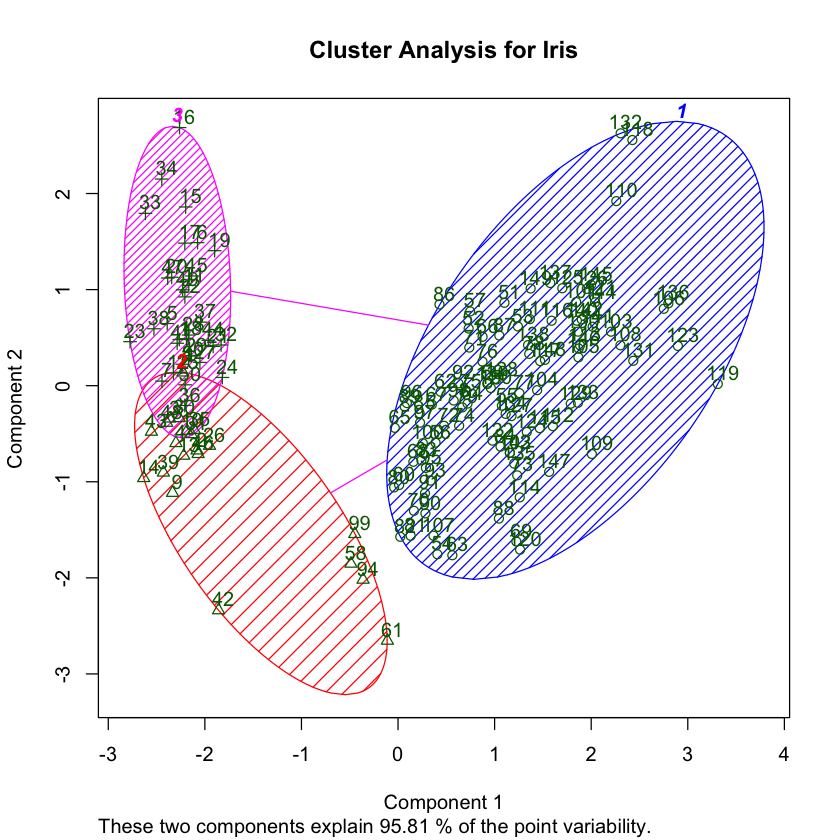

In [3]:
library(cluster)
KM <- kmeans(iris[1:4], 3, iter.max = 1000, algorithm = "Hartigan-Wong")
clusplot(iris[1:4], KM$cluster, color = TRUE, 
         shade = TRUE, labels=2,
         main = 'Cluster Analysis for Iris')

### Сегментация потребителей безалкогольных напитков

In [902]:
beverage <- read.table("https://raw.githubusercontent.com/dkhramov/iad_2020/master/lectures/04/data/beverage.csv", header=T, sep=";")

In [905]:
# Уберем ненужный 1-й столбец
beverage <- beverage[-1]

In [906]:
k = kmeans(beverage, 3, iter.max = 100)
# Важная опция nstart - число стартовых попыток задать центры кластеров.

In [907]:
# Транспонируем
t(k$centers)

1         2          3     
COKE    0.8333333 0.00000000 0.9375
D_COKE  1.0000000 0.91666667 0.0000
D_PEPSI 0.1666667 0.58333333 0.0000
D_7UP   0.0000000 0.58333333 0.0000
PEPSI   0.6666667 0.00000000 0.7500
SPRITE  0.5000000 0.08333333 0.4375
TAB     0.1666667 0.83333333 0.0000
SEVENUP 0.3333333 0.08333333 0.3750

In [908]:
# Сумма квадратов расстояний от объектов кластера до центра кластера
k$withinss

[1]  6.666667 10.250000 11.625000

In [909]:
# Сумма элементов предыдущего вектора
k$tot.withinss

k$totss
#  то же самое, что и 
#  sum(33*(apply(beverage, 2, sd))^2)

[1] 28.54167

[1] 58.38235

In [910]:
# Размеры кластеров
k$size

[1]  6 12 16

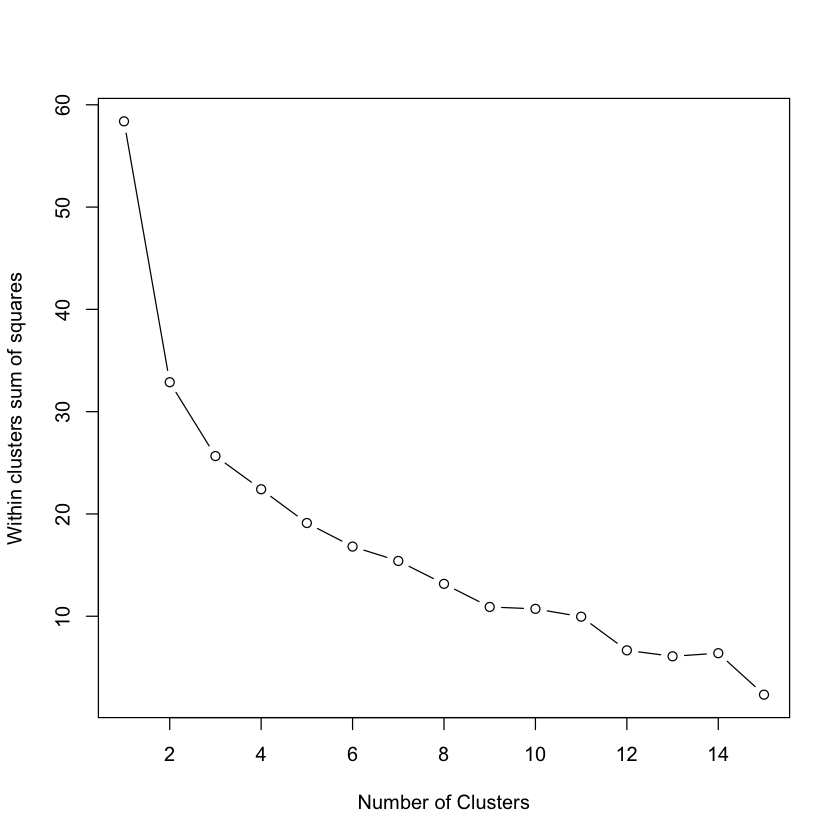

In [911]:
# Попробуем определить "правильное" число кластеров

# Максимальное число кластеров
n.clust <- 15
# Вектор для хранения результатов
wcss <- vector(mode="numeric", length=n.clust)
# Запускаем kmeans для k от 1 до 15
for(i in 1:n.clust){
  wcss[i] <- kmeans(beverage, centers=i)$tot.withinss
}
plot(1:n.clust, wcss, type="b", xlab="Number of Clusters",
     ylab="Within clusters sum of squares")

   
     1  2  3  4
  1  0  3  1  2
  2 11  0  0  1
  3  0  5  5  6

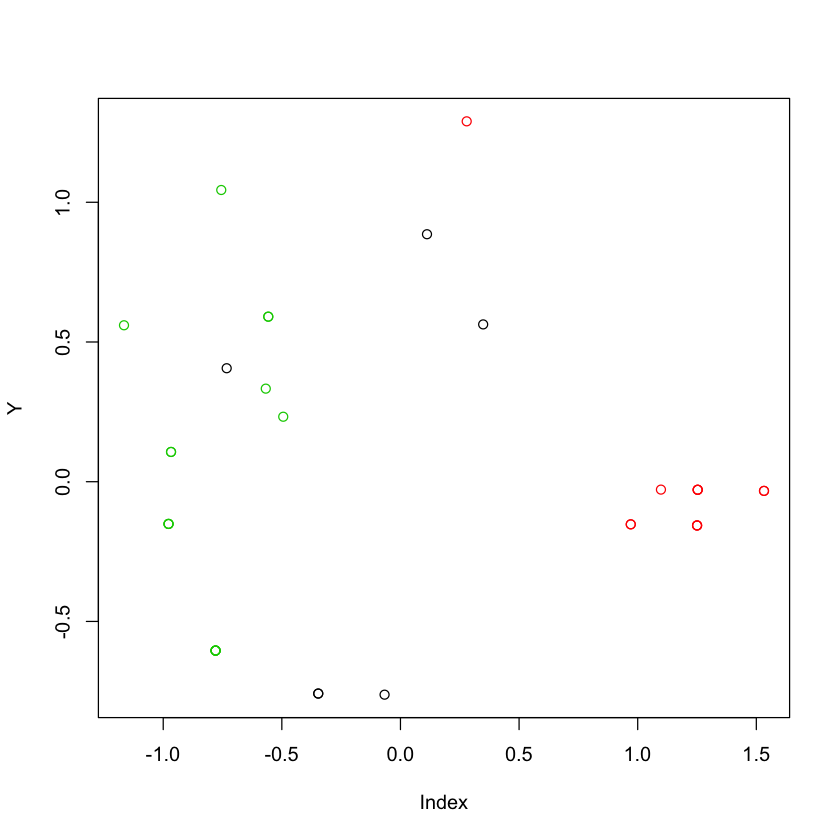

In [912]:
##  Попробуем решение с 4 кластерами и сравним результаты

k4 = kmeans(beverage, 4, iter.max = 100)

#  Для сравнения использовать команду
table(k$cluster, k4$cluster)


##  Проекция данных на плоскость (Multidimentional scaling)

beverage.dist <- dist(beverage)
# Многомерное шкалирование
beverage.mds <- cmdscale(beverage.dist)

plot(beverage.mds, col = k$cluster, xlab = "Index", ylab = "Y")

Функцию get_coefficients получает на вход dataframe с двумя переменными x ( фактор с произвольным числом градаций) и y (фактор с двумя градациями). Функция строит логистическую модель, где y — зависимая переменная, а x — независимая, и возвращает вектор со значением экспоненты коэффициентов модели. 

In [1]:
get_coefficients <- function(dataset){
 fit <- glm(y ~ x, dataset, family = "binomial") 
 exp(fit$coefficients)
}

Функцию centered получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [12]:
# 1).
library(dplyr)
centered <- function(test_data, var_names){
  mutate_at(test_data, vars(var_names), list(~(. - mean(.))))
}

# 2).

centered <- function(test_data, var_names){
  test_data[var_names] <- sapply(test_data[var_names], function(x) x - mean(x))    
  return(test_data)    
}

In [11]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/cen_data.csv")
var_names = c("X4", "X2", "X1")
centered(test_data, var_names)

X1    X2   X3   X4   
1 -1.04 -1.2 10.7 -0.62
2 -1.44  1.9  9.7  1.68
3  0.06 -3.5  8.4  1.78
4  0.06  0.0  7.7 -2.92
5  2.36  2.8 12.3  0.08

Функция get_features получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная  - являлся ли багаж запрещенным, а предикторы - остальные переменные, и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

In [5]:
# 1).
get_features <- function(dataset){
  fit <- glm(is_prohibited ~ ., dataset, family = "binomial")   
  t <- anova(fit, test = "Chisq") 
  if (any(t$`Pr(>Chi)` < 0.05, na.rm = TRUE)){
    return(rownames(subset(t , t$`Pr(>Chi)` < 0.05)))
  } else {
      return("Prediction makes no sense")
    }
}

# 2).

get_features <- function(test_data){    
  fit <- glm(is_prohibited ~., test_data, family = 'binomial')    
  result <- anova(fit, test = 'Chisq')    
  if (all(result$`Pr(>Chi)`[-1] > 0.05)){      
    return('Prediction makes no sense')}    
  return(rownames(result)[-1] [result$`Pr(>Chi)`[-1] < 0.05])  
}

In [6]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_luggage_2.csv")
get_features(test_data)

[1] "length" "width"  "type"

Функция, которая принимает на вход два набора данных. Первый dataframe, как и в предыдущей задаче, содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки). 

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация:  вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере). 

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку. 

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами. 

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.

In [8]:
# 1).

most_suspicious <- function(test_data, data_for_predict){
  fit <- glm(is_prohibited ~ ., test_data, family = "binomial")
  odds <- sapply(predict(fit, newdata = data_for_predict), exp)
  return(data_for_predict$passangers[which(odds == max(odds)), ])
}

# 2).

most_suspicious <- function(test_data, data_for_predict){    
  fit <- glm(is_prohibited ~., test_data, family = 'binomial')    
  probs <- predict(fit, newdata = data_for_predict, type = 'response')    
  index <- which(probs == max(probs))    
  passanger_name <- data_for_predict$passangers[index]    
  return(passanger_name)    
}

In [9]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_passangers.csv")
data_for_predict <-read.csv("https://stepic.org/media/attachments/course/524/predict_passangers.csv")
most_suspicious(test_data, data_for_predict)

[1] Svetozar
10 Levels: Anatoliy Bob Ivan Martin Nikolay Polina Poul Svetozar ... Vsevolod

Функция normality_test получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.

In [12]:
# 1).

library(dplyr)
normality_test <- function(dataset){
  dataset %>% select_if(is.numeric) %>% 
    sapply(function(x) shapiro.test(x)$p.value)
}
           
# 2).
           
normality_test <- function(dataset){    
  numeric_var <- sapply(dataset, is.numeric)
  sapply(dataset[numeric_var], function(x) shapiro.test(x)$p.value)    
}

In [13]:
test <- read.csv("https://stepic.org/media/attachments/course/524/test.csv")
normality_test(test)

V1          V3          V5          V6 
0.568208352 0.245833708 0.314189423 0.009373741

Функция smart_anova получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.

In [14]:
# 1).

smart_anova <- function(test_data){
  splitted <- split(test_data, test_data$y)
  if (all(unlist(lapply(splitted, function(x) shapiro.test(x[[1]])$p.value)) > 0.05) &
    bartlett.test(x ~ y, test_data)$p.value > 0.05) {
      result <- c(ANOVA = summary(aov(x ~ y, test_data))[[1]]$'Pr(>F)'[1])
  } else {
      result <- c(KW = kruskal.test(x ~ y, test_data)[[3]])
  }
  return(result)
}
                 
# 2).
                 
smart_anova <- function(test){  
  p_normal <- unlist(by(test[, 1], test[, 2], function(x) shapiro.test(x)$p.value))   
  sd_equal <- bartlett.test(x ~ y, test)$p.value  
  if (all(p_normal > 0.05) & sd_equal > 0.05){    
      fit <- aov(x ~ y, test)    
      result <- c(ANOVA = summary(fit)[[1]]$'Pr(>F)'[1])    
      return(result)  
  } else {    
      fit <- kruskal.test(x ~ y, test)    
      result <- c(KW = fit$p.value)    
      return(result)    
      }    
}               

In [18]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")
smart_anova(test_data)

ANOVA 
0.265298

Функция normality_by принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста ﻿ shapiro.test 

In [22]:
# 1).
normality_by <- function(test){
  setNames(aggregate(x ~ ., test, FUN = function(x) shapiro.test(x)$p.value), 
           c(names(test_data)[-3], "p_value")) 
}
           
# 2).
           
normality_by <- function(test){    
  grouped_data <- aggregate(test[,1],by=list(test[,2], test[,3]),                                  
    FUN = function(x) {shapiro.test(x)$p.value})                                  
  names(grouped_data) <- c(colnames(test)[2:3],'p_value')                                  
  return(grouped_data)    
}
           
# 3). Используя dplyr (при условии, что мы знаем имена переменных в данных):

library(dplyr)    
normality_by <- function(test_data){    
  result <- test_data %>% group_by(y, z) %>%     
  summarize(p_value = shapiro.test(x)$p.value)     
  return(result)    
}

# 4). Более общее решение с dplyr:
    
get_p_value <- function(x){      
  shapiro.test(x)$p.value}    

normality_by <- function(test){    
  grouped <- test %>%    
  group_by_(.dots = colnames(.)[2:3]) %>%         
  summarise_each(funs(get_p_value))         
  names(grouped)[3] <- 'p_value'         
  return(grouped)         
}

In [20]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")
normality_by(test_data)

x y p_value   
1 0 2 0.21976723
2 1 2 0.19603547
3 0 3 0.62381802
4 1 3 0.04782269

При помощи библиотеки ggplot2 визуализируем распределение переменной Sepal.Length в трех группах в данных Iris

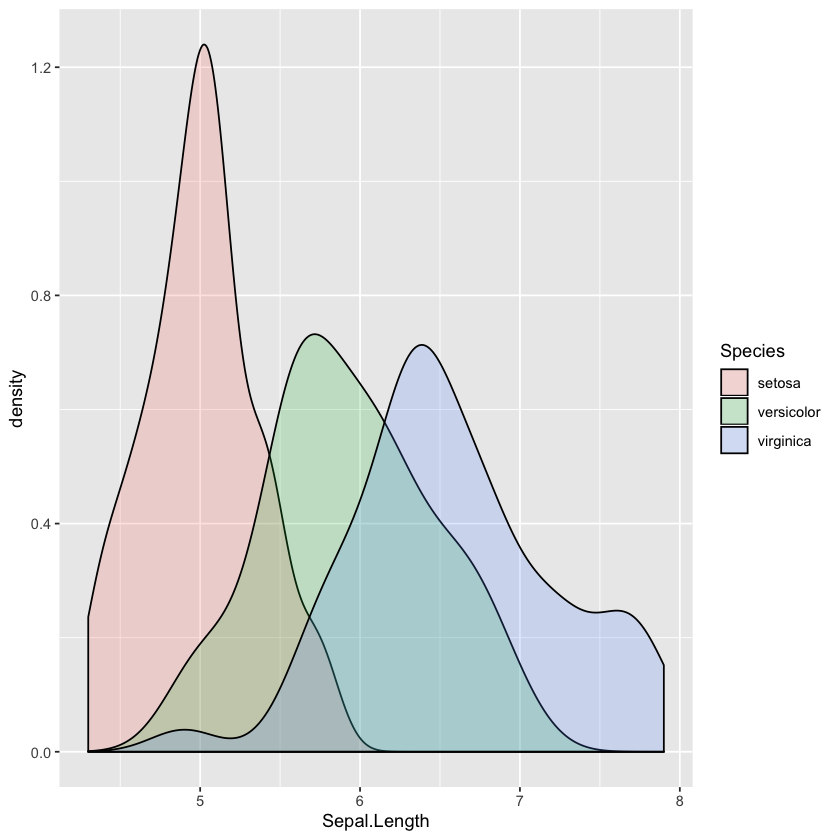

In [2]:
library(ggplot2)
ggplot(iris, aes(Sepal.Length, fill = Species)) +
  geom_density(alpha = 0.2)

Функция smart_hclust получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, к которому отнесено каждое из наблюдений.

In [4]:
# 1).

smart_hclust <- function(test_data, cluster_number){
  fit <- hclust(dist(test_data))
  clusters <- cutree(fit, k=cluster_number) 
  test_data$cluster <- as.factor(clusters)
  return(test_data)
}

# 2).
smart_hclust <- function(test_data, n_cluster){    
  d <- dist(test_data)    
  fit <- hclust(d)    
  test_data$cluster <- factor(cutree(fit, k = n_cluster))    
  return(test_data)    
}

In [5]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
smart_hclust(test_data, 3)

X1 X2 X3 X4 X5 cluster
1  11  7 10 10  8 1      
2   9 10 10  8  6 1      
3   9  2 12 14 11 1      
4   9 11  8 10  3 1      
5   7  9 10 11 14 1      
6   9 11  9  6  9 1      
7  16 20 22 19 16 2      
8  23 18 21 24 16 2      
9  15 21 14 21 21 3      
10 19 20 15 17 17 3      
11 20 24 21 20 19 2      
12 22 19 27 22 19 2

Функция get_difference получает на вход два аргумента: 

1. test_data — набор данных с произвольным числом количественных переменных.
2. n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.

Функция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными кластерами (p < 0.05). Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в исходные данные новую группирующую переменную — номер кластера, и сравниваем получившиеся группы между собой по количественным переменным при помощи дисперсионного анализа.

In [7]:
# 1).

library(dplyr)

get_difference <- function(test_data, n_cluster){
  clustered <- smart_hclust(test_data, n_cluster)
  names(which(sapply(X = select_if(clustered, is.numeric), 
      FUN = function(x) summary(aov(x ~ cluster, clustered))[[1]]$'Pr(>F)'[1]) < 0.05))
}
                     
# 2).
                     
get_difference <- function(test_data, n_cluster){    
  dist_matrix <- dist(test_data)    
  fit <- hclust(dist_matrix)    
  test_data$cluster <- as.factor(cutree(fit, n_cluster))    
  p_val <- sapply(test_data[,-ncol(test_data)],    
    function(x) {summary(aov(x~cluster, test_data))[[1]][1,'Pr(>F)']})    
  return(names(p_val)[p_val < 0.05])    
}

In [9]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/cluster_2.csv")
get_difference(test_data, 2)

[1] "V1" "V2"

Функцию get_pc получает на вход dataframe с произвольным числом количественных переменных. Функция должна выполнять анализ главных компонент и добавлять в исходные данные две новые колонки со значениями первой и второй главной компоненты. Новые переменные должны называться "PC1" и "PC2" соответственно.

In [10]:
get_pc <- function(d){
  cbind(d, prcomp(d)$x[, c(1:2)])
}

In [11]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
get_pc(test_data)

V1 V2 V3 V4 V5 PC1       PC2      
1 13 15 12 13 12 -4.500822  2.364595
2 16 11  8 12  6  3.039182 -1.929687
3 15  7 10 12 13 -2.752467 -5.076265
4 12 11  6  6  4  7.837194  1.688535
5 11 13 13 10 12 -3.623088  2.952822

Функцию get_pca2 принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

In [13]:
# 1).

get_pca2 <- function(data){
  fit <- prcomp(data)
  model.descr <- summary(fit)
  # Cumulative Proportion = cumsum(model.descr$sdev^2 / sum(model.descr$sdev^2))
  right.border <- which(cumsum(model.descr$sdev^2 / 
                         sum(model.descr$sdev^2)) > 0.9)[1]
  cbind(data, fit$x[, 1:right.border])
}

# 2).

get_pca2 <- function(test_data){    
  fit <- prcomp(test_data)    
  cum_prop <- summary(fit)$importance['Cumulative Proportion',]    
  test_data <- cbind(test_data, fit$x[,1:min(which(cum_prop>0.9))])    
  return(test_data)    
}

In [15]:
head(get_pca2(swiss))

Fertility Agriculture Examination Education Catholic
Courtelary   80.2      17.0        15          12         9.96   
Delemont     83.1      45.1         6           9        84.84   
Franches-Mnt 92.5      39.7         5           5        93.40   
Moutier      85.8      36.5        12           7        33.77   
Neuveville   76.9      43.5        17          15         5.16   
Porrentruy   76.1      35.3         9           7        90.57   
             Infant.Mortality PC1        PC2       
Courtelary   22.2              37.032433 -17.434879
Delemont     22.2             -42.797334 -14.687668
Franches-Mnt 20.2             -51.081639 -19.274036
Moutier      20.3               7.716707  -5.458722
Neuveville   20.6              35.032658   5.126097
Porrentruy   26.6             -44.161953 -25.922412

Функция is_multicol получает на вход dataframe произвольного размера с количественными переменными. Функция должна проверять существование строгой мультиколлинеарности, а именно наличие линейной комбинации между предикторами. Линейной комбинацией является ситуация, когда одна переменная может быть выражена через другую переменную при помощи уравнения $V1 = k*V2+bV1=k∗V2+b$. Например $V1 = V2 + 4$ или $V1 = V2 - 5$.

Функция возвращает имена переменных, между которыми есть линейная зависимость или cобщение "There is no collinearity in the data".

In [18]:
# 1). corr.test in psych

library(psych)
is_multicol <- function(d){
  corr.matrix <- corr.test(d)$r
  diag(corr.matrix) <- 0
  if (any(abs(corr.matrix) == 1)) {
    return(rownames(which(abs(corr.matrix) == 1, arr.ind = T)))
  } else {
    return("There is no collinearity in the data")
  }
}

# 2).

is_multicol <- function(d){    
  d <- abs(cor(d))     
  d[lower.tri(d)] <- 0    
  diag(d) <- 0    
  index <- which((1-d) < 1e-10, arr.ind = T)    
  if (length(index) == 0){      
    return('There is no collinearity in the data')    
  } else {      
    return(rownames(d)[index])      
    }      
}

In [19]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/Norris_2.csv")
is_multicol(test_data)

[1] "V1" "V2"

In [20]:
fit <- hclust(dist(swiss))
clusters <- cutree(fit, k=2) 
swiss$cluster <- factor(clusters)

library(ggplot2)
my_plot <- ggplot(swiss, aes(Education, Catholic, col = cluster)) +
  geom_point() +
  geom_smooth(method = "lm")

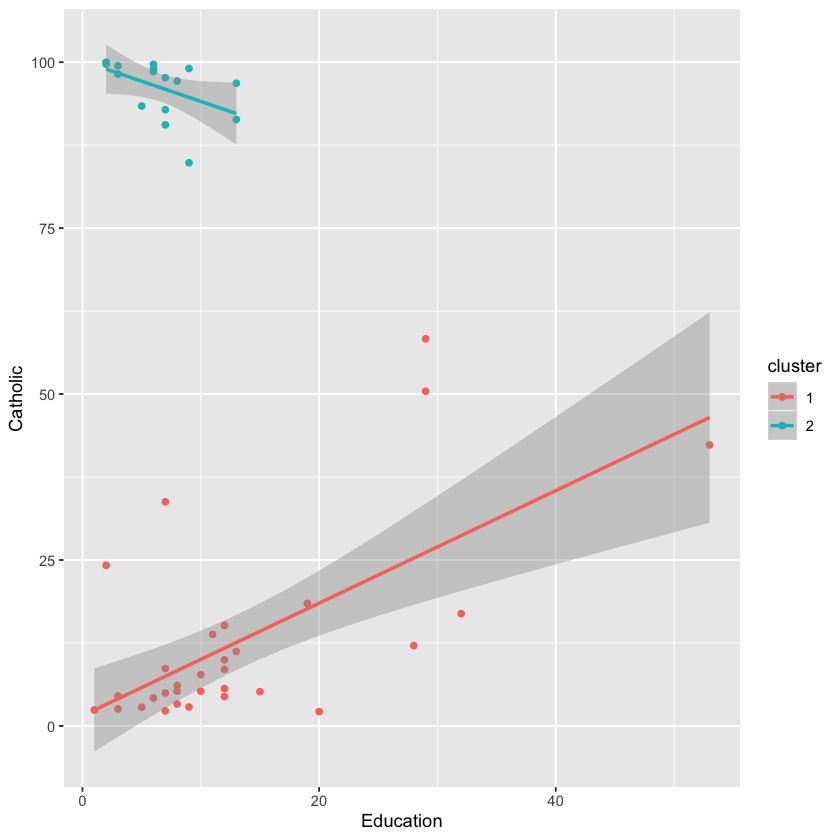

In [21]:
my_plot